# Fordgobike-Tripdata Exploration

## Preliminary Wrangling

This document explores a dataset containing bike_id and station_id for month Feb year 2019.
and determine the relationship between age for aproxemately every user and all rest of data collected.

### import packages

In [1]:
# import all packages and set plots to be embedded inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### fit figures and colors to be the same to all.

In [2]:
#to fit all figures as the same size.
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10

In [3]:
#to fit all figures as the same color
base_color = sb.color_palette()[0]

### load and overview the data.

In [4]:
# load in the dataset into a pandas dataframe, print statistics.
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [5]:
# high-level overview of data shape and composition.
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

(183412 rows, 16 columns) types integet, float, object

### Null Values

get sum of all null values in every column.

In [6]:
#get sum of all null values in every column.
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### handle the null values

member_birth_year: to make member birth of year don't afect on the vesialization<br>
                   we set mean of it to be in all null values.

fill null values which is Unknown with the name of it and fill null values with insight to get the location.

In [7]:
#fill null values with mean().
df['member_birth_year'].fillna(df['member_birth_year'].mean(), inplace = True)

In [8]:
# fill null values which is Unknown with the name of it.
df['member_gender'].fillna('Unknown', inplace = True)

In [9]:
# fill null values with insight to get the location.
df.fillna('latitude_longitude', inplace = True)

### search for any duplicated rows the result was 0

In [10]:
# find sum of duplicated values.
df.duplicated().sum()

0

### descripe count,mean,standard deviation,(first,median,third)quartile, min,and max of every column.

In [11]:
#describe the data
print(df.describe())

        duration_sec  start_station_latitude  start_station_longitude  \
count  183412.000000           183412.000000            183412.000000   
mean      726.078435               37.771223              -122.352664   
std      1794.389780                0.099581                 0.117097   
min        61.000000               37.317298              -122.453704   
25%       325.000000               37.770083              -122.412408   
50%       514.000000               37.780760              -122.398285   
75%       796.000000               37.797280              -122.286533   
max     85444.000000               37.880222              -121.874119   

       end_station_latitude  end_station_longitude        bike_id  \
count         183412.000000          183412.000000  183412.000000   
mean              37.771427            -122.352250    4472.906375   
std                0.099490               0.116673    1664.383394   
min               37.317298            -122.453704      11.000000 

### What is the structure of your dataset?

there are 183,412 rows of 3 types of data: <br>
duration_sec and start/end_time are quantitative continues,<br>
member_birth_year is quantitative descrite the rest of data are categorical nominal.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out which features are predicting which age is more productive and help us to be the best?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

member_birth_year and our known the data for Feb 2019 will determine the age,<br>
duration_sec will determine the productivity<br>
rest of data will determine which best age for us or interval of age 

# Univariate Exploration

I will substract year of birth from year of data to get the age of every user.

In [12]:
df['age'] = 2019 - df['member_birth_year']

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.000000,Male,No,35.000000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984.806437,Unknown,No,34.193563
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.000000,Male,No,47.000000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.000000,Other,No,30.000000
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.000000,Male,Yes,45.000000


column age is quantitative continues.

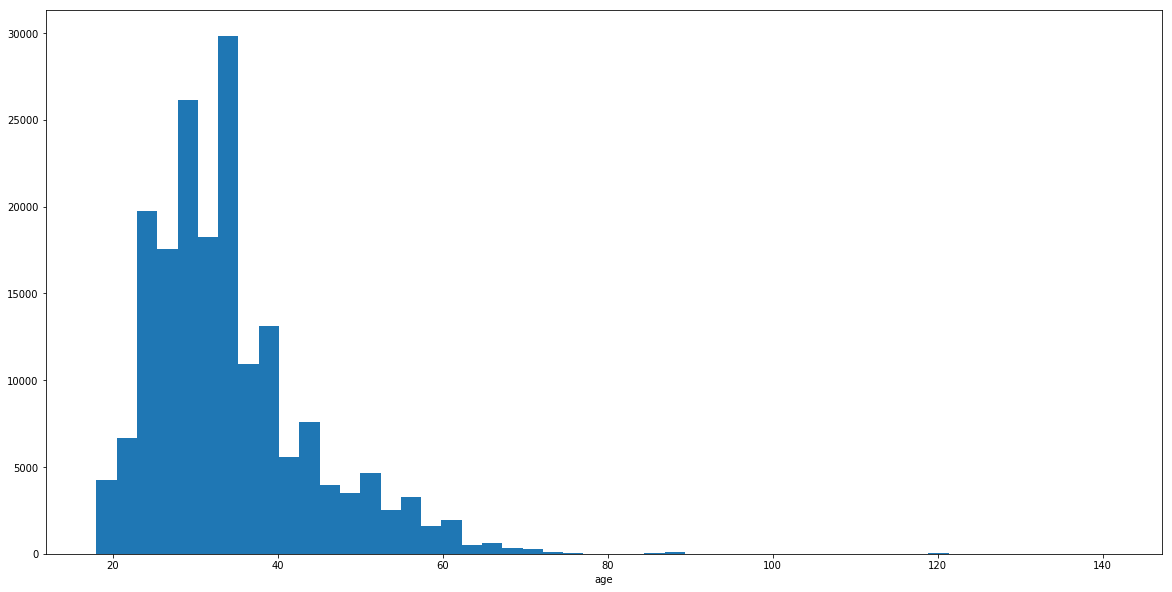

In [14]:
sb.distplot(df['age'], kde = False, hist_kws = {'alpha' : 1}, color = base_color);

In [15]:
df.age.min(), df.age.max()

(18.0, 141.0)

In [16]:
df['age'].mean()

34.19356312126385

In [17]:
df['age'].value_counts().head()

31.0    10236
26.0     9325
30.0     8972
29.0     8658
28.0     8498
Name: age, dtype: int64

In [18]:
df['age'].value_counts().sum()

183412

In [19]:
(df['age'].value_counts().head().sum())/ (df['age'].value_counts().sum())

0.24910583822214469

In [20]:
(df['age'].value_counts().head(11).sum())/ (df['age'].value_counts().sum())

0.50857086777310101

In [21]:
(df['age'].value_counts().head(20).sum())/ (df['age'].value_counts().sum())

0.75817285673783608

In [22]:
(df['age'].value_counts().head(31).sum())/ (df['age'].value_counts().sum())

0.90380127799707766

In [23]:
top_5 = df['age'].value_counts().head()
top_5 = top_5.reset_index()
top_5 = top_5.rename(columns = {'index':'age', 'age':'sum of values'})
top_5

,age,sum of values
0,31.0,10236
1,26.0,9325
2,30.0,8972
3,29.0,8658
4,28.0,8498


25% of data in this ages {26, [28 : 31]}

In [24]:
top_11 = df['age'].value_counts().head(11)
top_20 = df['age'].value_counts().head(20)
top_31 = df['age'].value_counts().head(31)

In [25]:
top_11 = top_11.reset_index()
top_20 = top_20.reset_index()
top_31 = top_31.reset_index()

In [26]:
top_11 = top_11.rename(columns = {'index':'age', 'age':'sum of values'})
top_20 = top_20.rename(columns = {'index':'age', 'age':'sum of values'})
top_31 = top_31.rename(columns = {'index':'age', 'age':'sum of values'})

In [27]:
top_11

,age,sum of values
0,31.000000,10236
1,26.000000,9325
2,30.000000,8972
3,29.000000,8658
4,28.000000,8498
5,34.193563,8265
6,27.000000,8250
7,32.000000,8018
8,33.000000,7973
9,25.000000,7660


In [28]:
top_11['age'].min(), top_11['age'].max()

(24.0, 34.193563121263878)

In [29]:
top_20['age'].min(), top_20['age'].max()

(22.0, 40.0)

In [30]:
top_31['age'].min(), top_31['age'].max()

(20.0, 51.0)

50% of data between 24 years old and 33 years old.<br>
75% of data between 22 years old and 40 years old.<br>
90% of data between 20 years old and 51 years old.<br>
90% of data from 20 to 48 years old and 51 years old.

In [31]:
top_31.sort_values('age')

,age,sum of values
24,20.000000,2528
20,21.000000,3208
19,22.000000,3481
16,23.000000,4640
10,24.000000,7423
9,25.000000,7660
1,26.000000,9325
6,27.000000,8250
4,28.000000,8498
3,29.000000,8658


In [32]:
value_pro = df['age'].value_counts()

In [33]:
value_pro.head()

31.0    10236
26.0     9325
30.0     8972
29.0     8658
28.0     8498
Name: age, dtype: int64

In [34]:
value_pro = value_pro.reset_index()

In [35]:
value_pro = value_pro.rename(columns = {'index':'age', 'age':'sum of values'})

In [36]:
value_pro[value_pro.index<2]

,age,sum of values
0,31.0,10236
1,26.0,9325


In [37]:
value_pro[value_pro.index<2]['sum of values'].sum()

19561

In [38]:
(value_pro[value_pro.index<31]['sum of values'].sum())/ (df['age'].value_counts().sum())

0.90380127799707766

In [39]:
(value_pro[value_pro.index<20]['sum of values'].sum())/ (df['age'].value_counts().sum())

0.75817285673783608

In [40]:
(value_pro[value_pro.index<11]['sum of values'].sum())/ (df['age'].value_counts().sum())

0.50857086777310101

In [41]:
value_50 = value_pro.sort_index()[0:12]

In [42]:
value_75 = value_pro.sort_index()[0:21]

In [43]:
value_90 = value_pro.sort_index()[0:32]

In [44]:
value_50['age'].min(),value_50['age'].max()

(24.0, 34.193563121263878)

In [45]:
value_50.sort_values('age')

,age,sum of values
10,24.000000,7423
9,25.000000,7660
1,26.000000,9325
6,27.000000,8250
4,28.000000,8498
3,29.000000,8658
2,30.000000,8972
0,31.000000,10236
7,32.000000,8018
8,33.000000,7973


In [46]:
value_75['age'].min(),value_75['age'].max() 

(21.0, 40.0)

the shape of data is right skewd from age 18 to 141 the average of ages is 34 years old.<br> 
count of age increase from 18 to 31 and then decrease.<br>
90% of data between 19 years old and 51 years old.<br>
75% of data between 21 years old and 40 years old.<br>
50% of data between 24 years old and 34 years old.

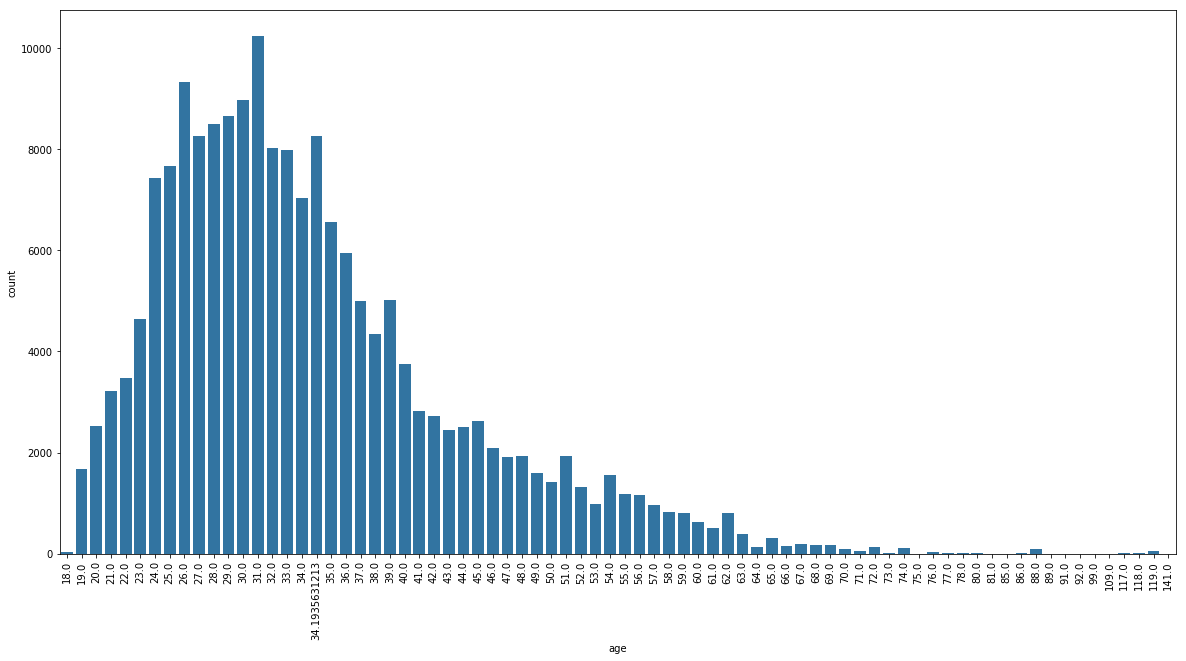

In [47]:
sb.countplot(data = df, x = 'age', color = base_color);
plt.xticks(rotation = 90);

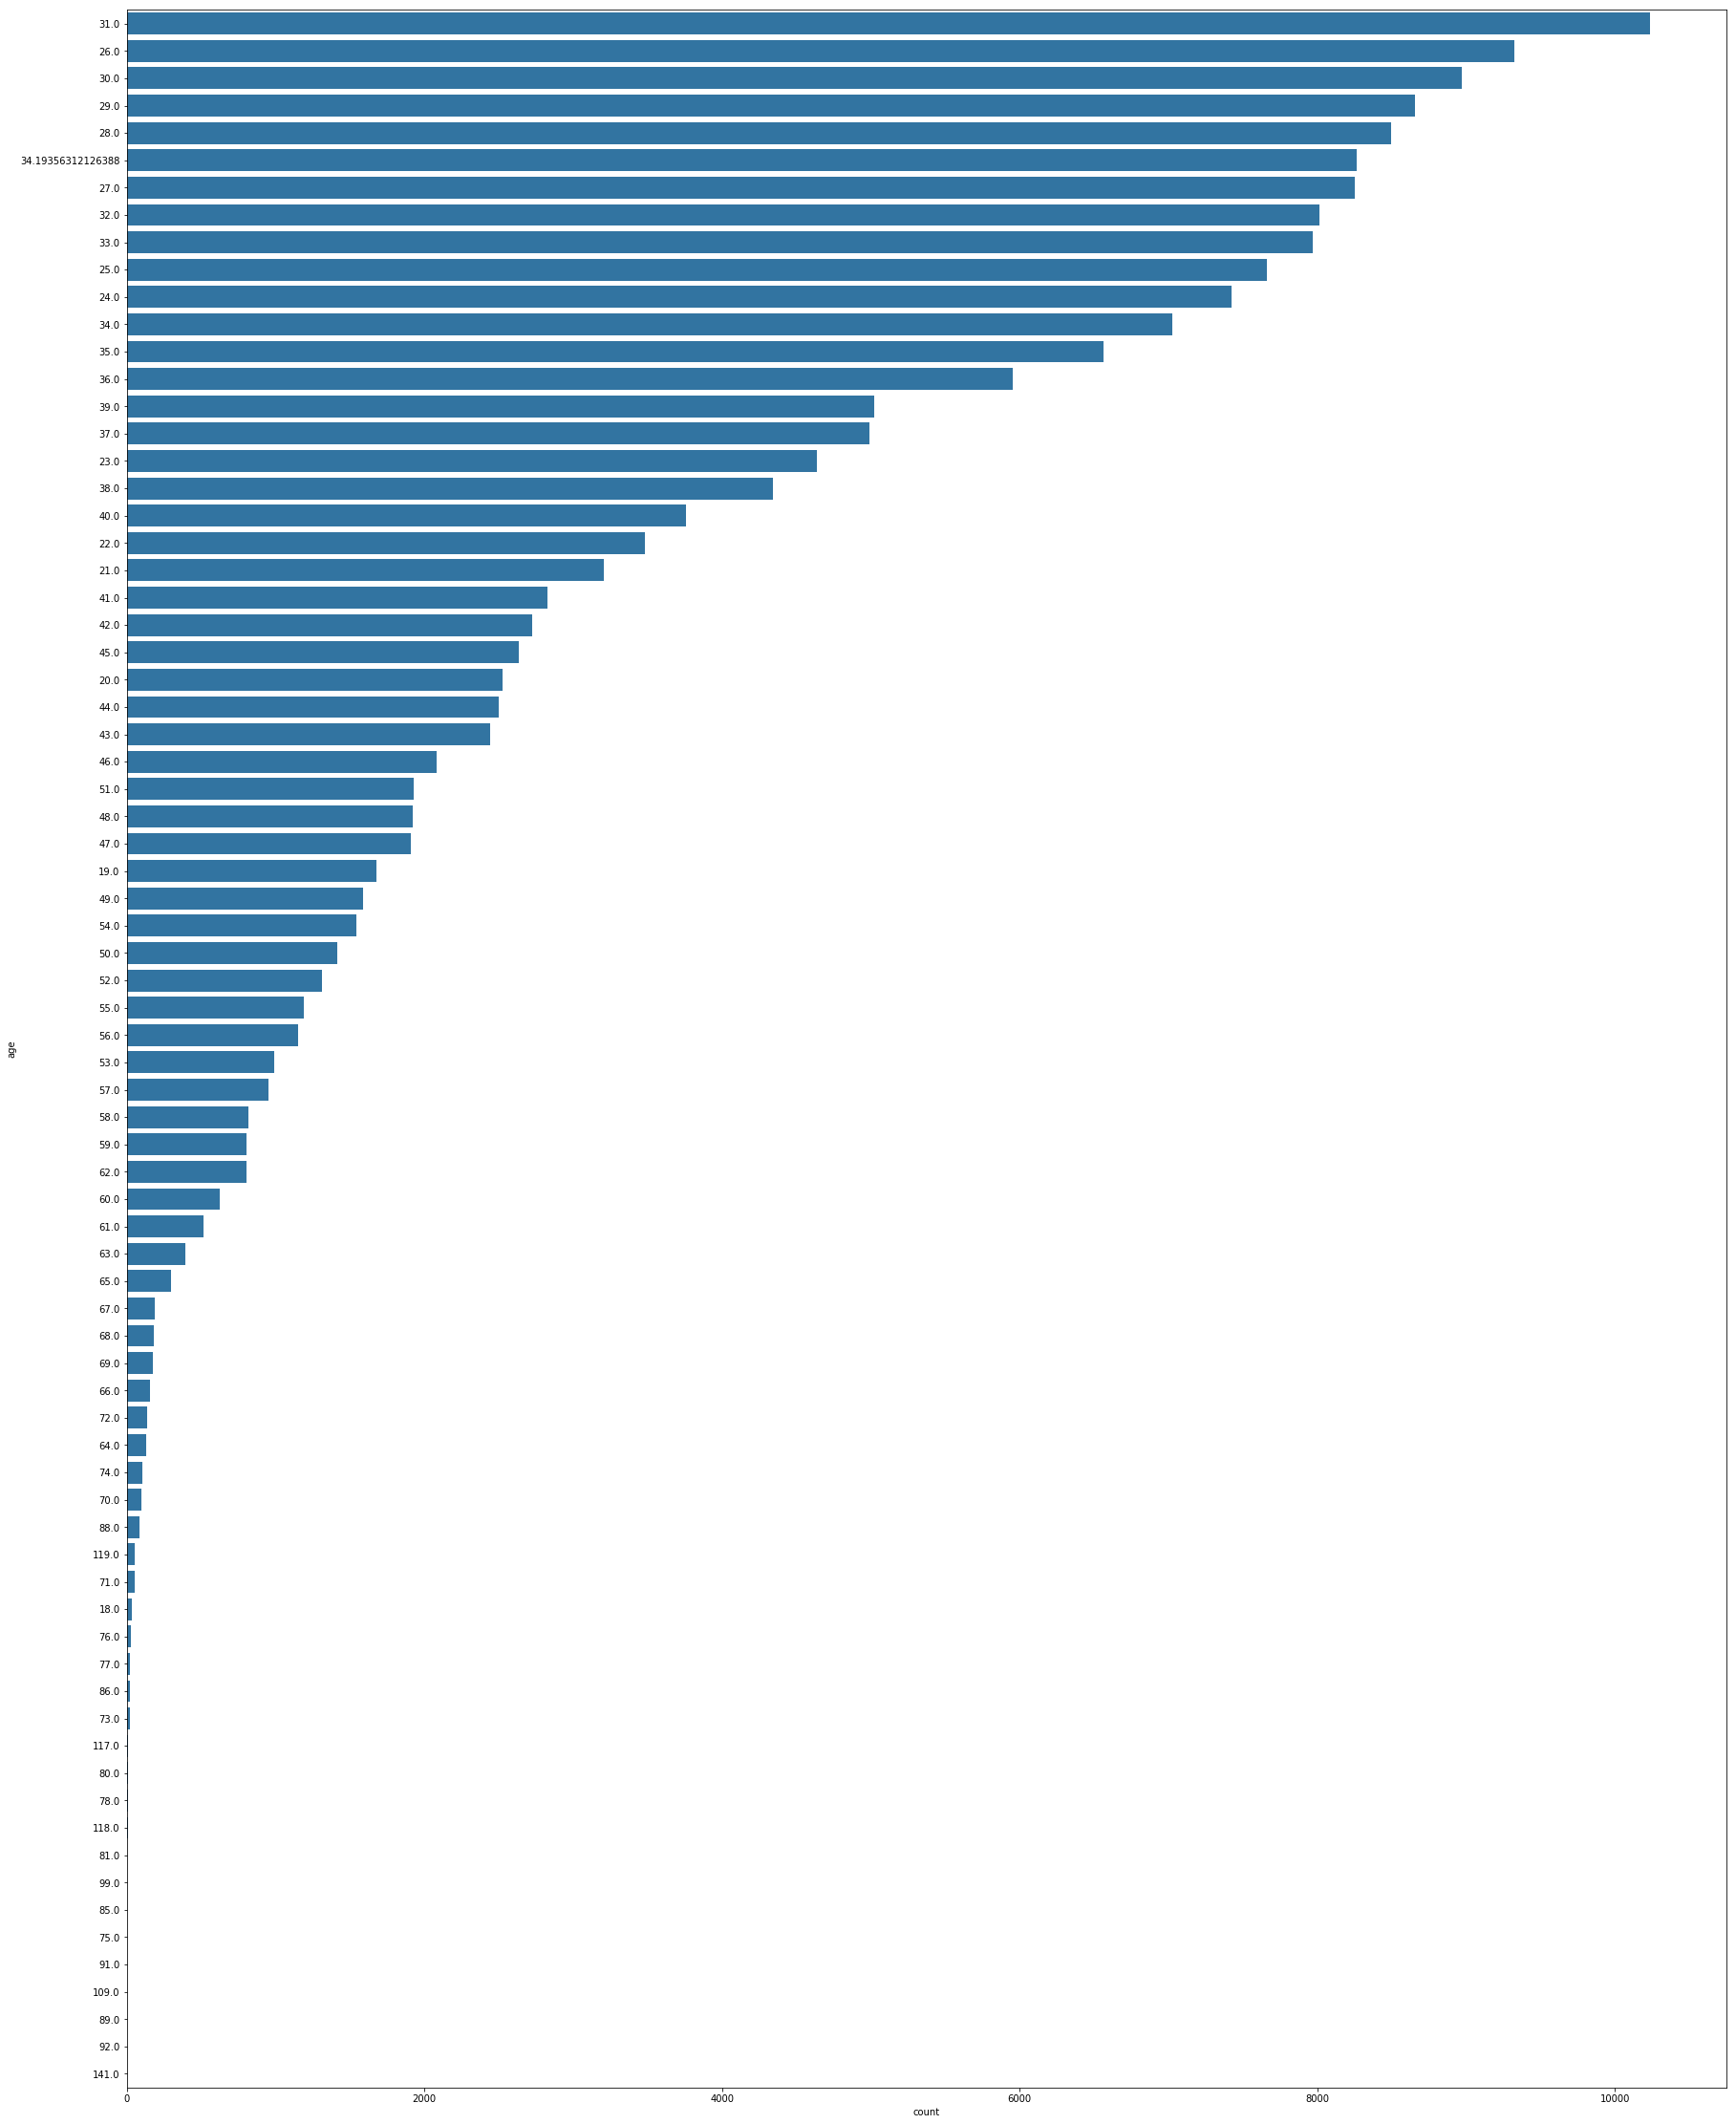

In [48]:
plt.figure(figsize=[30, 40])
age_order = df['age'].value_counts().index
sb.countplot(data = df, y = 'age', color = base_color, order = age_order);

# Bivariate

duration_sec and start/end_time are quantitative continues,<br>
column age is quantitative continues.

In [49]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age'],
      dtype='object')

Text(0,0.5,'duration of ride bike per/secand')

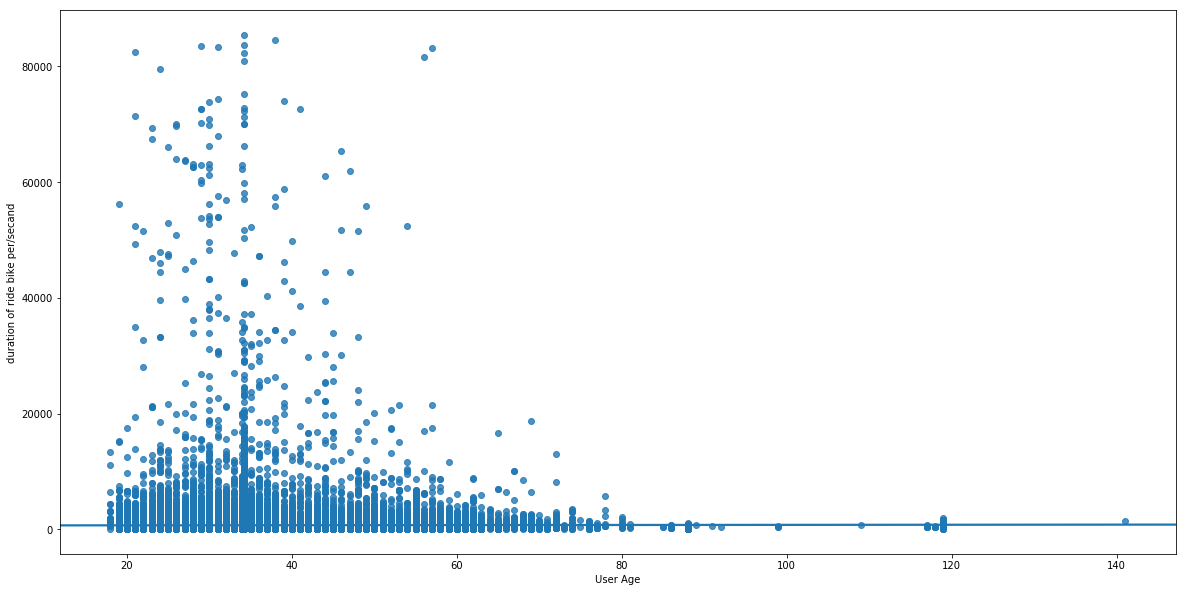

In [50]:
sb.regplot(data = df, x = 'age', y = 'duration_sec')
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

as you see we don't find any relationship between age and duration. 

In [51]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_day'] = df['start_time'].dt.day
df['start_week'] = df['start_time'].dt.week
df['start_hour'] = df['start_time'].dt.hour

In [52]:
df['end_time'] = pd.to_datetime(df['end_time'])
df['end_day'] = df['end_time'].dt.day
df['end_week'] = df['end_time'].dt.week
df['end_hour'] = df['end_time'].dt.hour

In [53]:
under_max = df.query("age <= 31")

Text(0,0.5,'duration of ride bike per/secand')

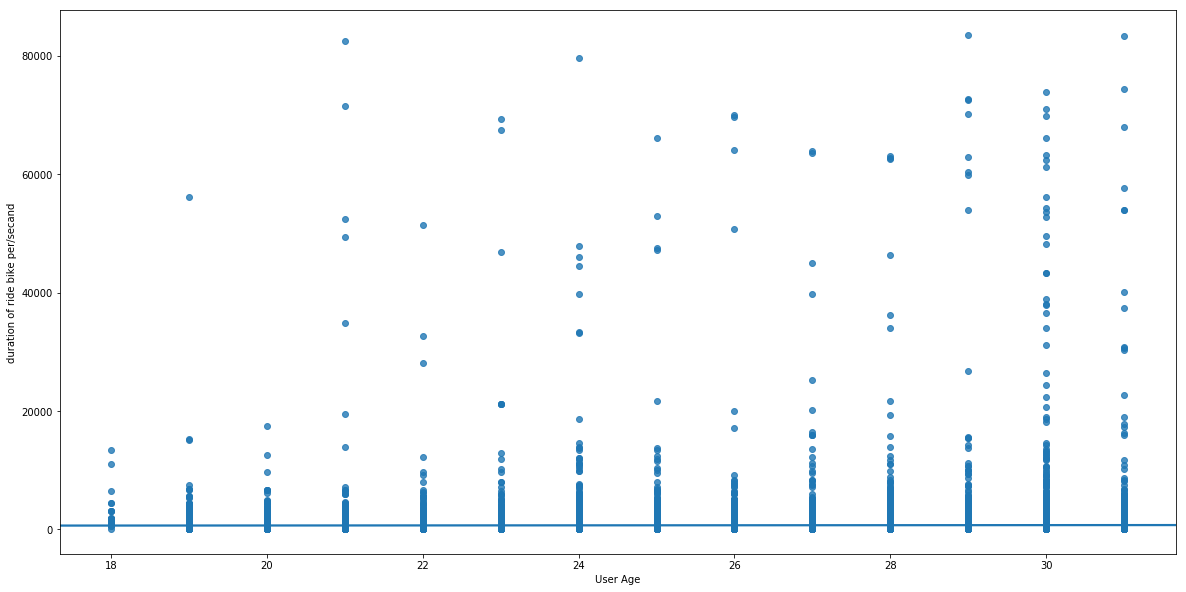

In [54]:
sb.regplot(data = under_max, x = 'age', y = 'duration_sec')
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

In [55]:
ubove_max = df.query("age > 31")

Text(0,0.5,'duration of ride bike per/secand')

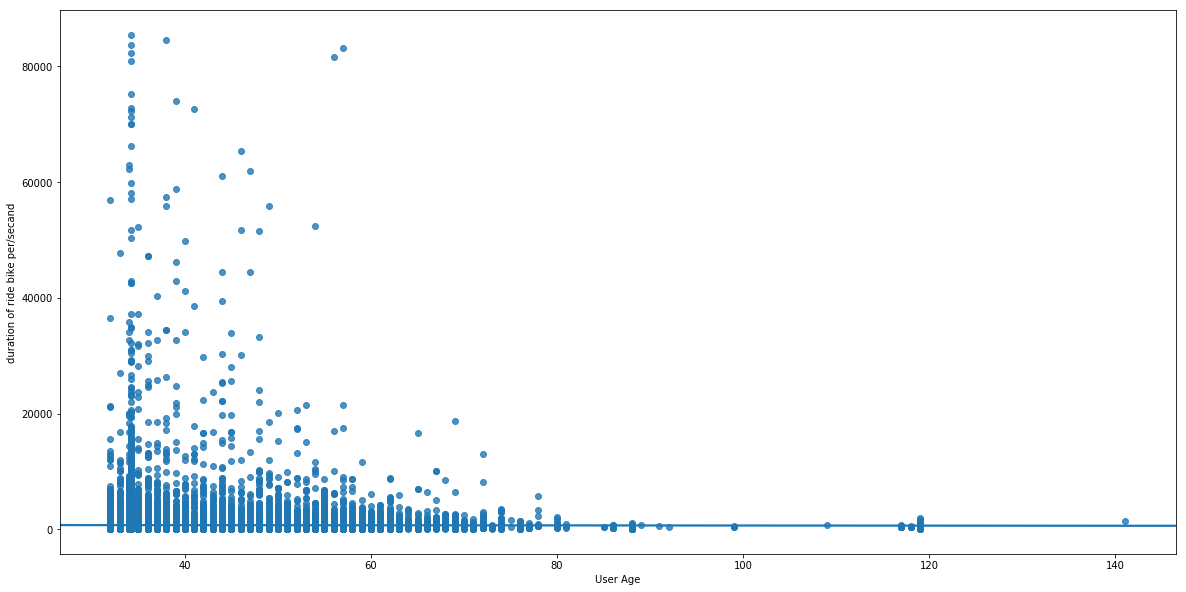

In [56]:
sb.regplot(data = ubove_max, x = 'age', y = 'duration_sec')
plt.xlabel('User Age')
plt.ylabel('duration of ride bike per/secand')

Text(0,0.5,'Start day of every age')

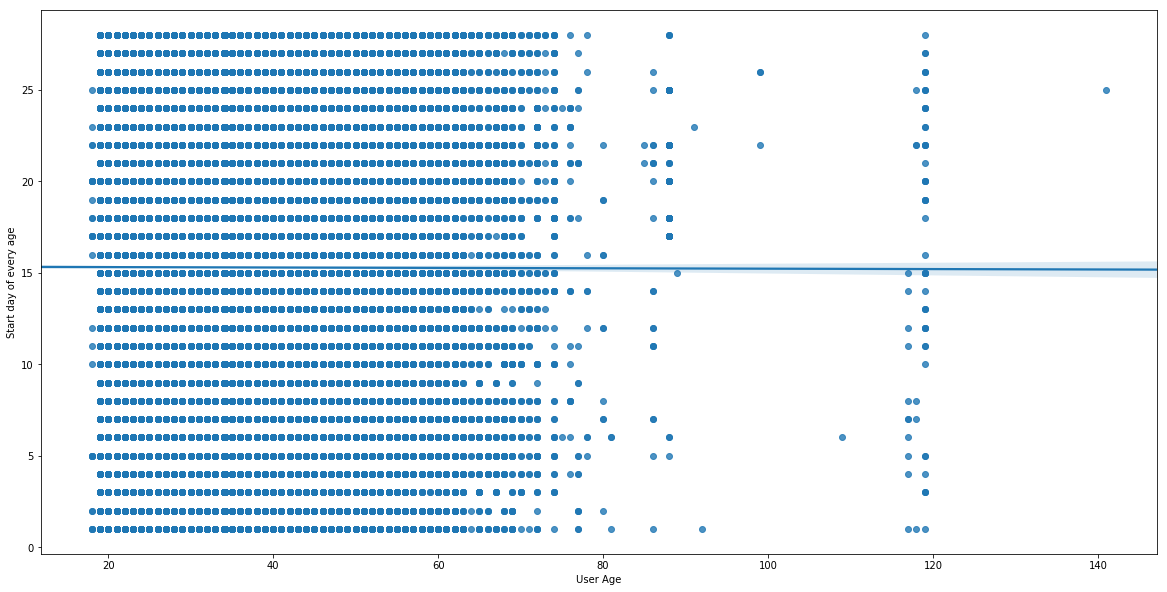

In [57]:
sb.regplot(data = df, x = 'age', y = 'start_day')
plt.xlabel('User Age')
plt.ylabel('Start day of every age')

Text(0,0.5,'Start week of every age')

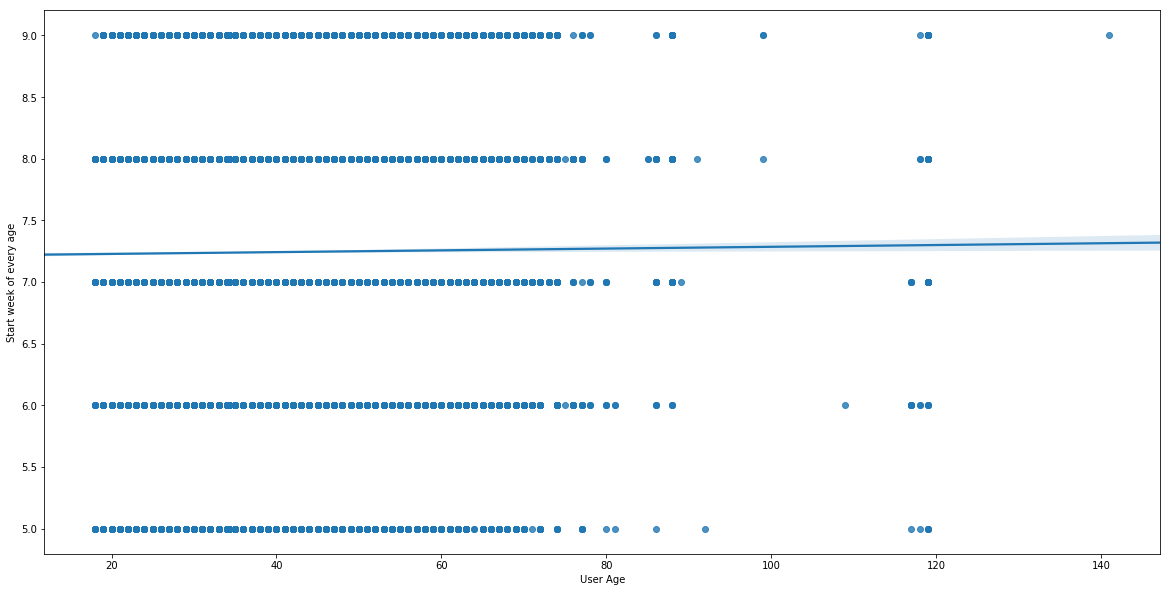

In [58]:
sb.regplot(data = df, x = 'age', y = 'start_week')
plt.xlabel('User Age')
plt.ylabel('Start week of every age')

In [59]:
df[['age', 'start_hour']].describe()

,age,start_hour
count,183412.000000,183412.000000
mean,34.193563,13.458421
std,9.886118,4.724978
min,18.000000,0.000000
25%,27.000000,9.000000
50%,32.000000,14.000000
75%,38.000000,17.000000
max,141.000000,23.000000


Text(0,0.5,'Start hour of every age')

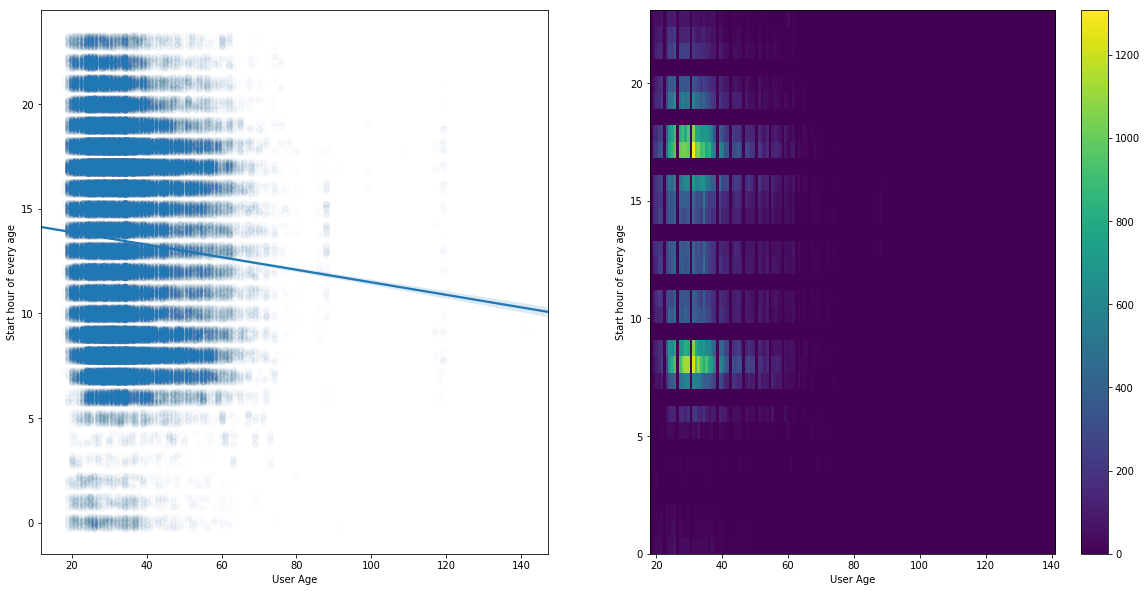

In [60]:
plt.subplot(1,2,1)
sb.regplot(data = df, x = 'age', y = 'start_hour', truncate=False, y_jitter = 0.3, scatter_kws = {'alpha':1/80})
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

plt.subplot(1,2,2)
bins_x = np.arange(18, 141+.8, .8)
bins_y = np.arange(0, 23+.7, .7)
plt.hist2d(data = df, x = 'age', y = 'start_hour', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

Text(0,0.5,'Start hour of every age')

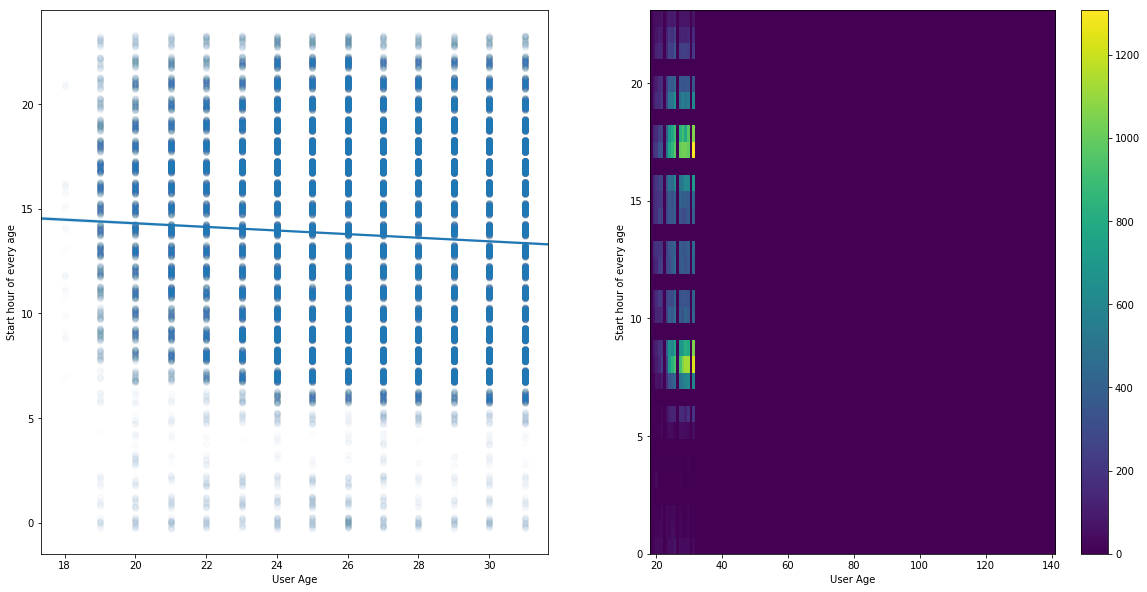

In [61]:
plt.subplot(1,2,1)
sb.regplot(data = under_max, x = 'age', y = 'start_hour', truncate=False, y_jitter = 0.3, scatter_kws = {'alpha':1/80})
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

plt.subplot(1,2,2)
bins_x = np.arange(18, 141+.8, .8)
bins_y = np.arange(0, 23+.7, .7)
plt.hist2d(data = under_max, x = 'age', y = 'start_hour', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

Text(0,0.5,'Start hour of every age')

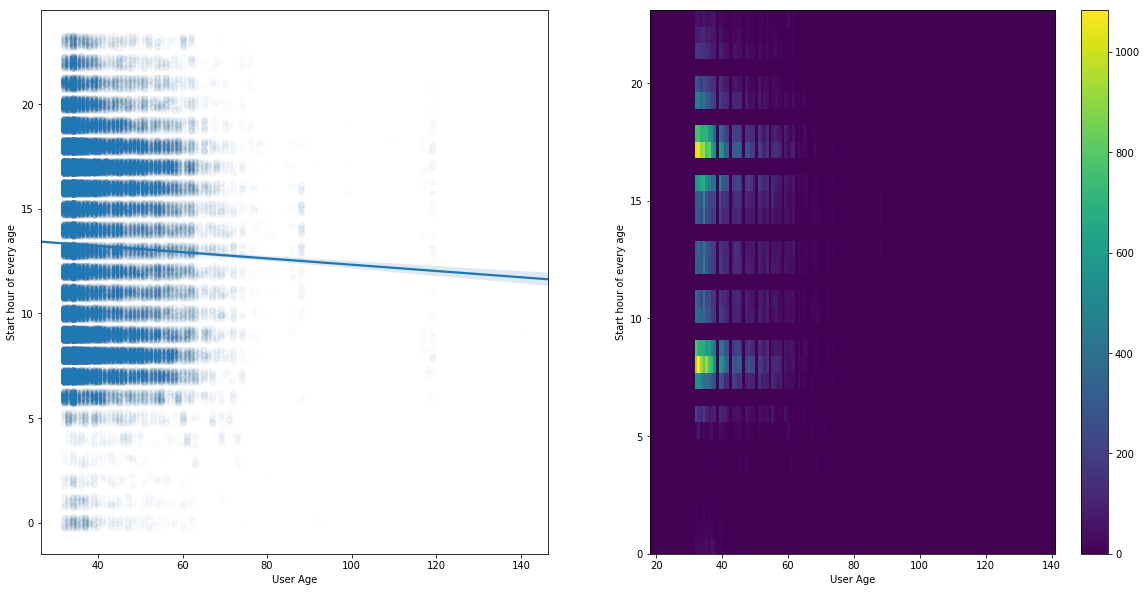

In [62]:
plt.subplot(1,2,1)
sb.regplot(data = ubove_max, x = 'age', y = 'start_hour', truncate=False, y_jitter = 0.3, scatter_kws = {'alpha':1/80})
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

plt.subplot(1,2,2)
bins_x = np.arange(18, 141+.8, .8)
bins_y = np.arange(0, 23+.7, .7)
plt.hist2d(data = ubove_max, x = 'age', y = 'start_hour', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

above 31 years old people love to ride bike in the morning between 7 and 9 a.m<br>
or between 4 and 6 p.m more than other times.  

Text(0,0.5,'end day of every age')

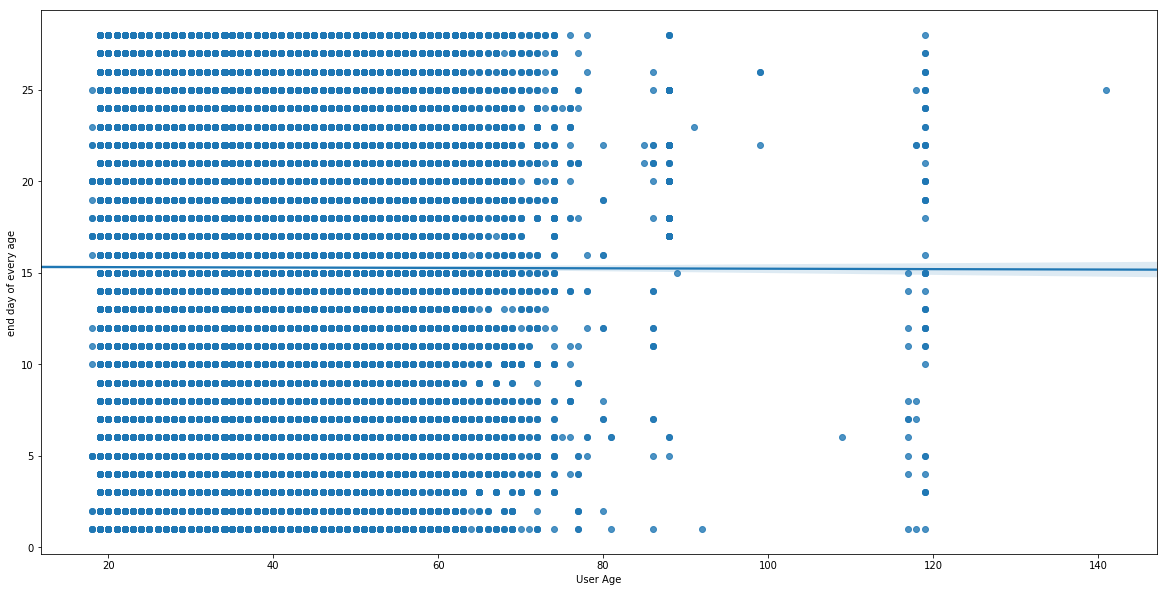

In [63]:
sb.regplot(data = df, x = 'age', y = 'end_day')
plt.xlabel('User Age')
plt.ylabel('end day of every age')

Text(0,0.5,'end week of every age')

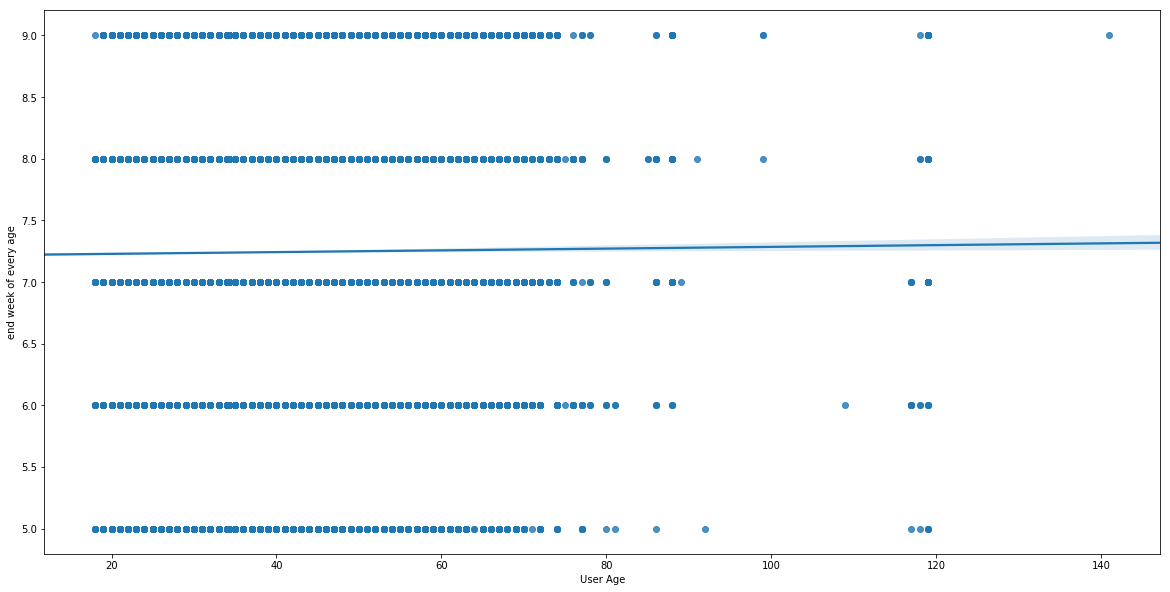

In [64]:
sb.regplot(data = df, x = 'age', y = 'end_week')
plt.xlabel('User Age')
plt.ylabel('end week of every age')

In [65]:
df[['age', 'end_hour']].describe()

,age,end_hour
count,183412.000000,183412.000000
mean,34.193563,13.614769
std,9.886118,4.739638
min,18.000000,0.000000
25%,27.000000,9.000000
50%,32.000000,14.000000
75%,38.000000,18.000000
max,141.000000,23.000000


Text(0,0.5,'Start hour of every age')

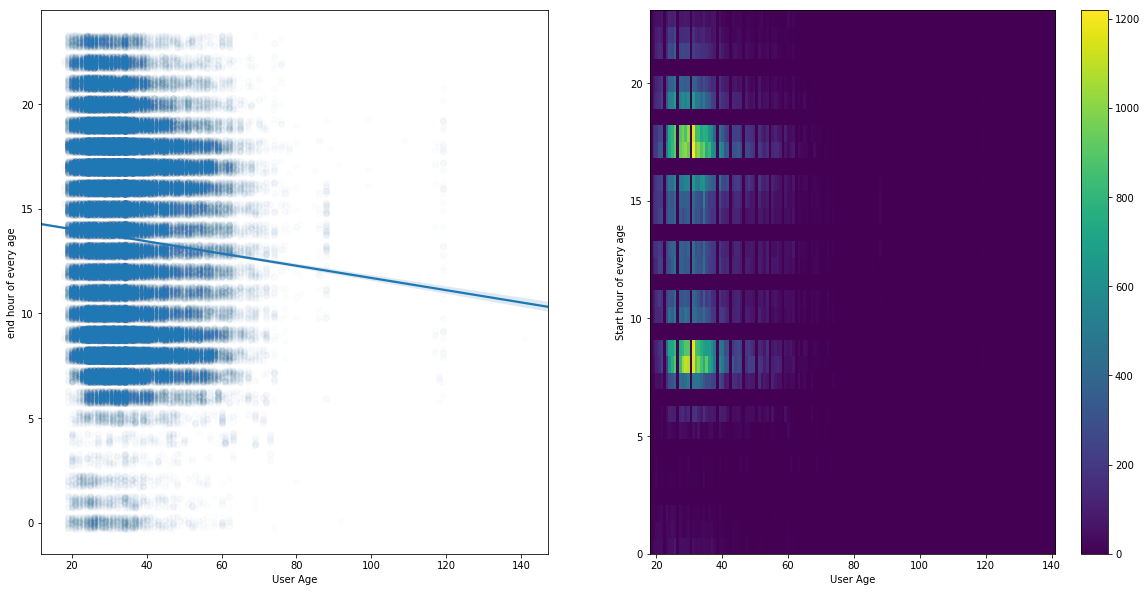

In [66]:
plt.subplot(1,2,1)
sb.regplot(data = df, x = 'age', y = 'end_hour', truncate=False, y_jitter = 0.3, scatter_kws = {'alpha':1/80})
plt.xlabel('User Age')
plt.ylabel('end hour of every age')

plt.subplot(1,2,2)
bins_x = np.arange(18, 141+.8, .8)
bins_y = np.arange(0, 23+.7, .7)
plt.hist2d(data = df, x = 'age', y = 'end_hour', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

Text(0,0.5,'Start hour of every age')

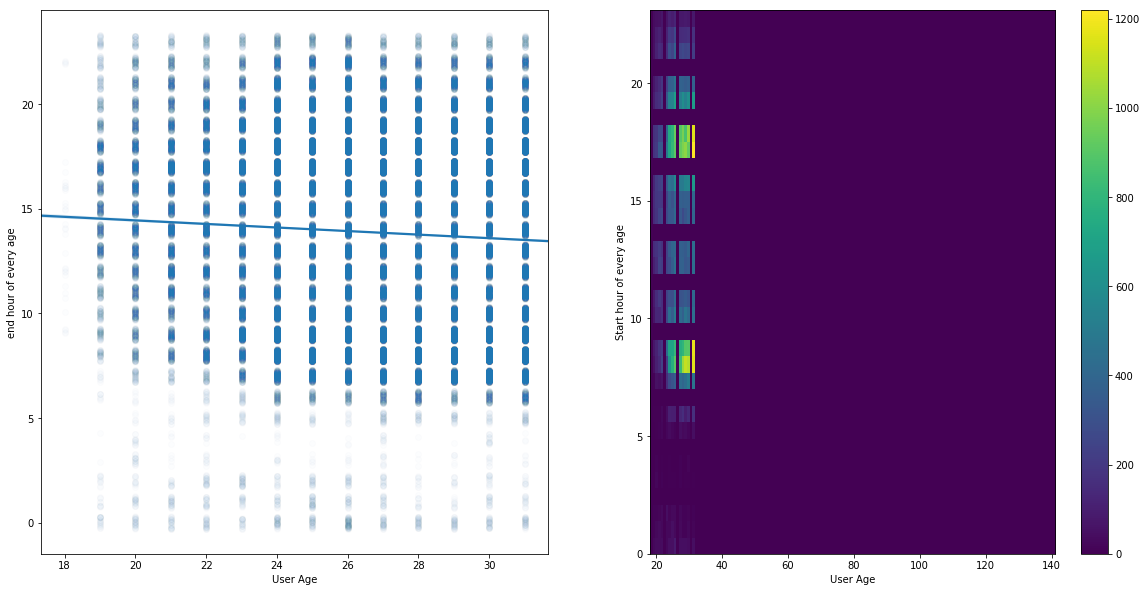

In [67]:
plt.subplot(1,2,1)
sb.regplot(data = under_max, x = 'age', y = 'end_hour', truncate=False, y_jitter = 0.3, scatter_kws = {'alpha':1/80})
plt.xlabel('User Age')
plt.ylabel('end hour of every age')

plt.subplot(1,2,2)
bins_x = np.arange(18, 141+.8, .8)
bins_y = np.arange(0, 23+.7, .7)
plt.hist2d(data = under_max, x = 'age', y = 'end_hour', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

Text(0,0.5,'Start hour of every age')

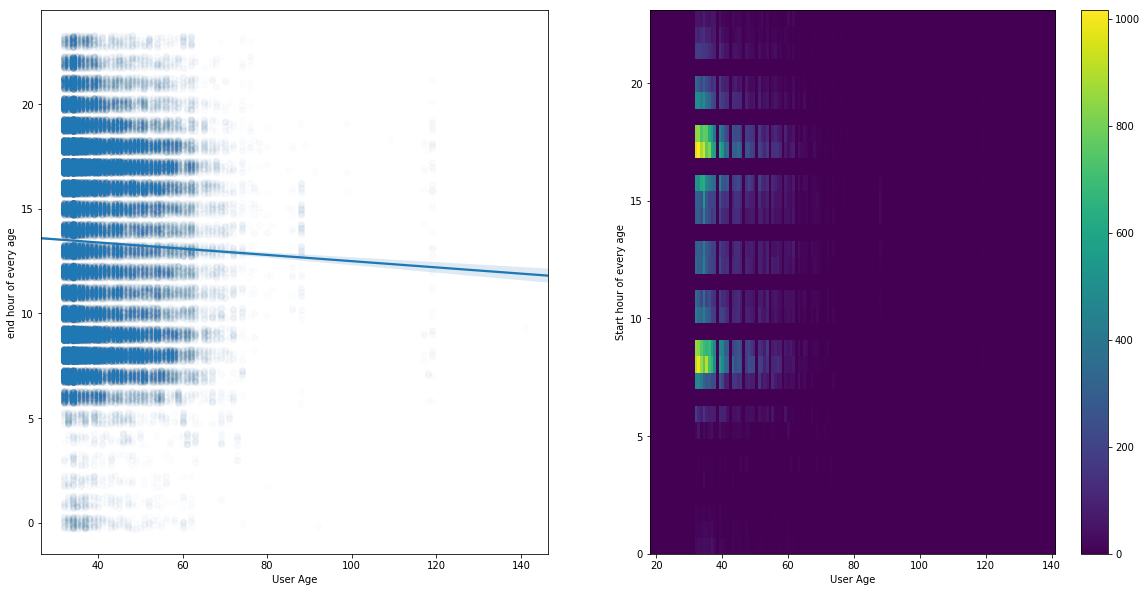

In [68]:
plt.subplot(1,2,1)
sb.regplot(data = ubove_max, x = 'age', y = 'end_hour', truncate=False, y_jitter = 0.3, scatter_kws = {'alpha':1/80})
plt.xlabel('User Age')
plt.ylabel('end hour of every age')

plt.subplot(1,2,2)
bins_x = np.arange(18, 141+.8, .8)
bins_y = np.arange(0, 23+.7, .7)
plt.hist2d(data = ubove_max, x = 'age', y = 'end_hour', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('User Age')
plt.ylabel('Start hour of every age')

member_birth_year is quantitative descrite the rest of data are categorical nominal

In [69]:
#columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_day', 'start_week', 'start_hour', 'end_day', 'end_week',
       'end_hour'],
      dtype='object')

In [70]:
#get to know number of unique values of every column
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              330
start_station_name            330
start_station_latitude        334
start_station_longitude       335
end_station_id                330
end_station_name              330
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              76
member_gender                   4
bike_share_for_all_trip         2
age                            76
start_day                      28
start_week                      5
start_hour                     24
end_day                        28
end_week                        5
end_hour                       24
dtype: int64

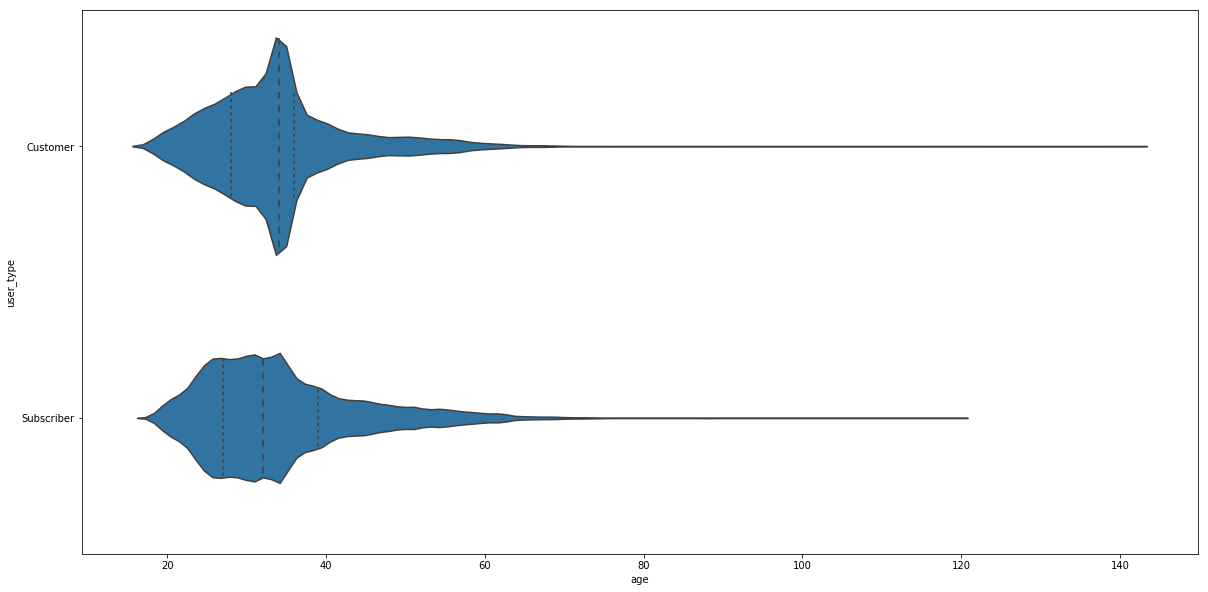

In [71]:
sb.violinplot(data = df, y = 'user_type', x = 'age', color = base_color, inner = 'quartile')

In [72]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [73]:
customer = df.query("user_type == 'Customer'")
subscriber = df.query("user_type == 'Subscriber'")

In [74]:
customer['age'].describe()

count    19868.000000
mean        33.729292
std          8.674753
min         18.000000
25%         28.000000
50%         34.000000
75%         36.000000
max        141.000000
Name: age, dtype: float64

In [75]:
subscriber['age'].describe()

count    163544.000000
mean         34.249965
std          10.021871
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: age, dtype: float64

aproxemetly all of data combined between 20 and 40 years old<br> 
half of customers between 28 and 36 years old<br>
half of subscribers between 27 and 39 years old

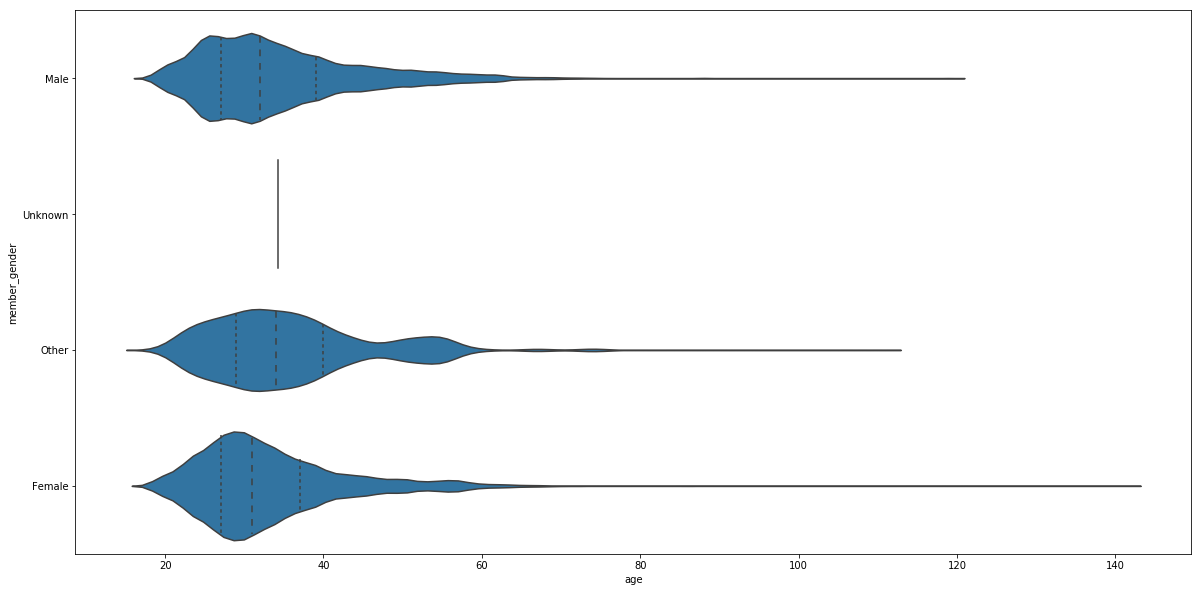

In [76]:
sb.violinplot(data = df, y = 'member_gender', x = 'age', color = base_color, inner = 'quartile')

In [77]:
df['member_gender'].unique()

array(['Male', 'Unknown', 'Other', 'Female'], dtype=object)

In [78]:
male = df.query("member_gender == 'Male'")
female = df.query("member_gender == 'Female'")
other = df.query("member_gender == 'Other'")

In [79]:
male['age'].describe()

count    130651.000000
mean         34.451600
std          10.342477
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         119.000000
Name: age, dtype: float64

In [80]:
female['age'].describe()

count    40844.000000
mean        33.217462
std          9.283190
min         18.000000
25%         27.000000
50%         31.000000
75%         37.000000
max        141.000000
Name: age, dtype: float64

In [81]:
other['age'].describe()

count    3652.000000
mean       35.878970
std        10.104609
min        19.000000
25%        29.000000
50%        34.000000
75%        40.000000
max       109.000000
Name: age, dtype: float64

aproxemetly males 130,500 females 40,500 other 3500<br>
males above more than females 3 times others and unknown out of competetion<br>
mean between 33 and 34 years old at all and standard deviation between 9 and 10 years old when we consider male and female <br>
half of males between 27 and 39 <br>
half of females between 26 and 37<br>
greater age in male 119 ,and in female 141

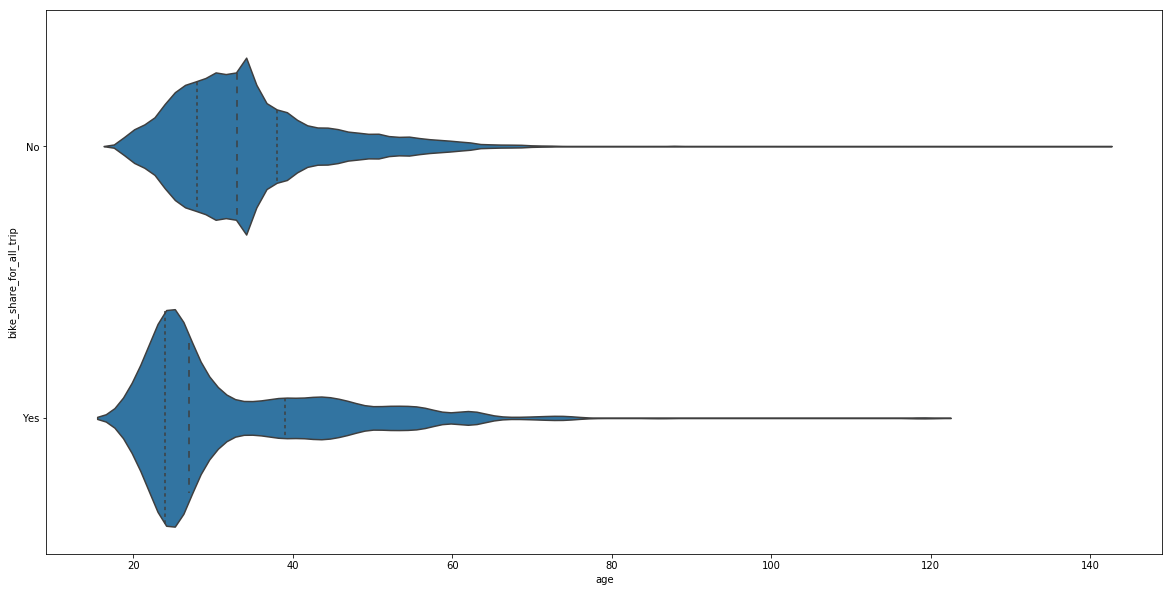

In [82]:
sb.violinplot(data = df, y = 'bike_share_for_all_trip', x = 'age', color = base_color, inner = 'quartile')

In [83]:
df.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

In [84]:
bike_all = df.query("bike_share_for_all_trip=='Yes'")
bike_not_all = df.query("bike_share_for_all_trip=='No'")

In [85]:
bike_all.age.describe()

count    17359.000000
mean        32.488968
std         12.444220
min         19.000000
25%         24.000000
50%         27.000000
75%         39.000000
max        119.000000
Name: age, dtype: float64

In [86]:
bike_not_all.age.describe()

count    166053.000000
mean         34.371760
std           9.561858
min          18.000000
25%          28.000000
50%          33.000000
75%          38.000000
max         141.000000
Name: age, dtype: float64

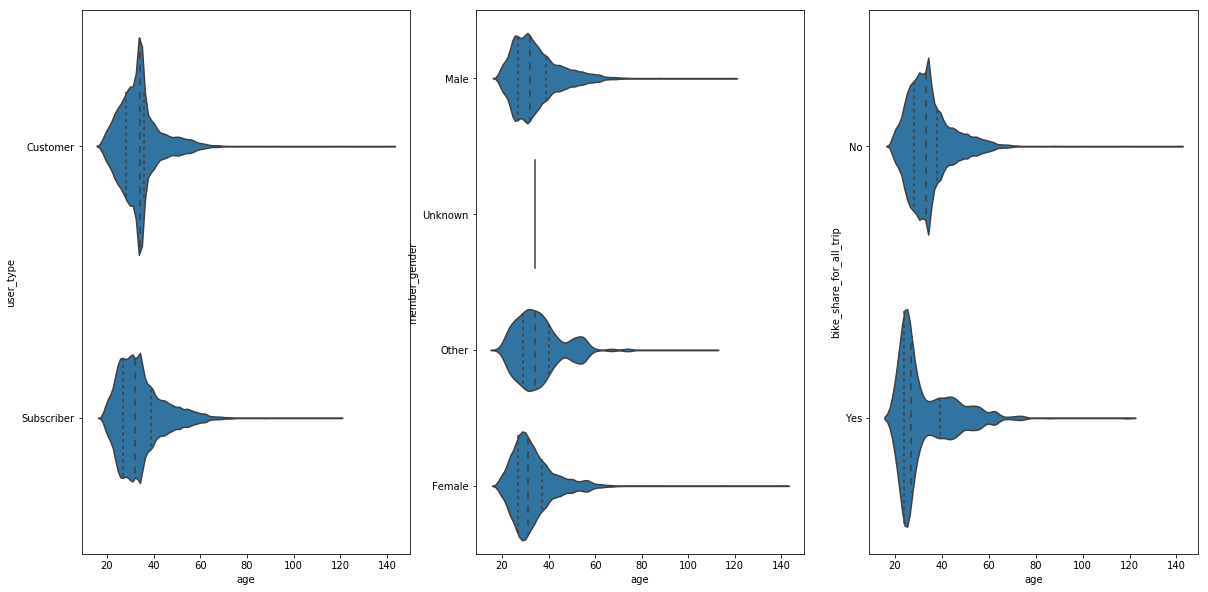

In [87]:
plt.subplot(1,3,1)
sb.violinplot(data = df, y = 'user_type', x = 'age', color = base_color, inner = 'quartile')
plt.subplot(1,3,2)
sb.violinplot(data = df, y = 'member_gender', x = 'age', color = base_color, inner = 'quartile')
plt.subplot(1,3,3)
sb.violinplot(data = df, y = 'bike_share_for_all_trip', x = 'age', color = base_color, inner = 'quartile')

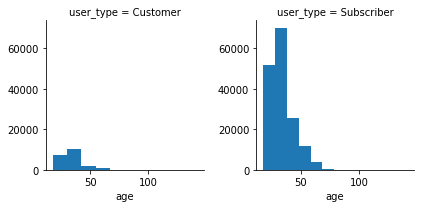

In [88]:
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, 'age')

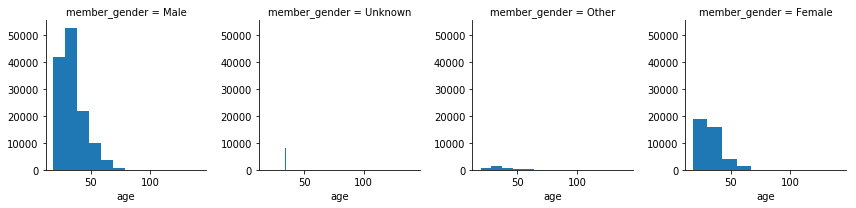

In [89]:
g = sb.FacetGrid(data = df, col = 'member_gender')
g.map(plt.hist, 'age')

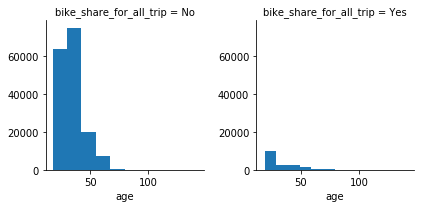

In [90]:
g = sb.FacetGrid(data = df, col = 'bike_share_for_all_trip')
g.map(plt.hist, 'age')

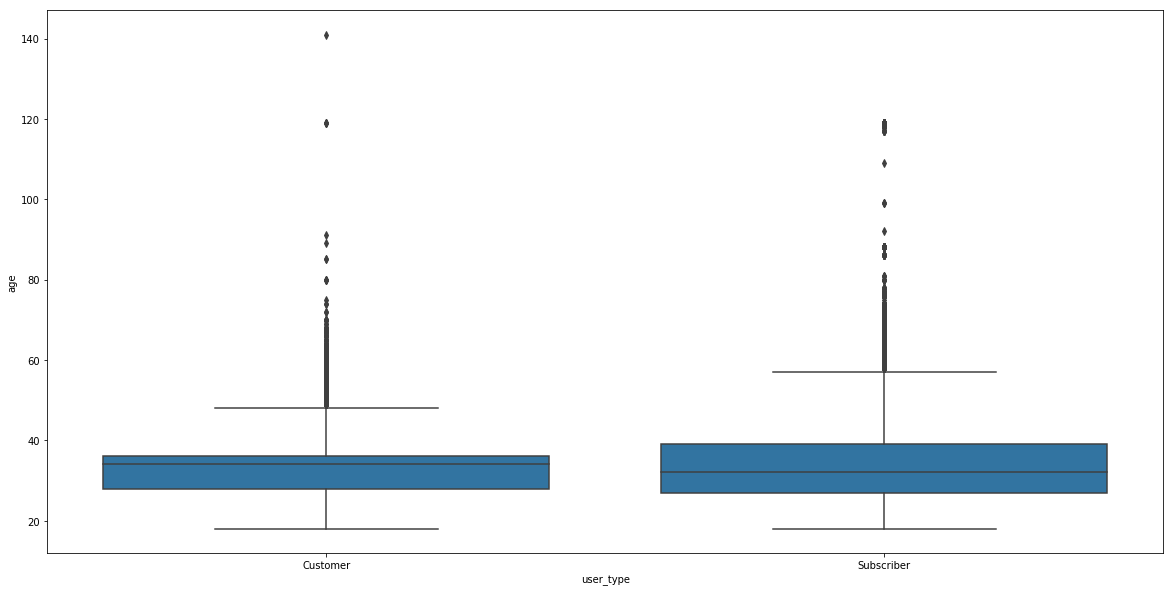

In [91]:
sb.boxplot(data = df, x = 'user_type', y = 'age', color = base_color)

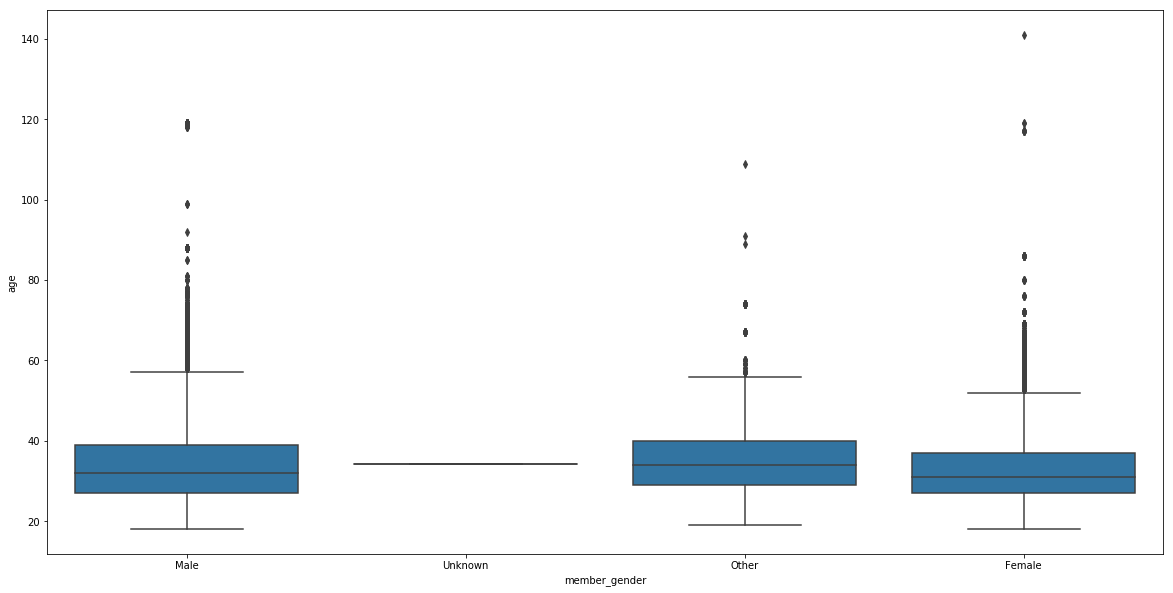

In [92]:
sb.boxplot(data = df, x = 'member_gender', y = 'age', color = base_color)

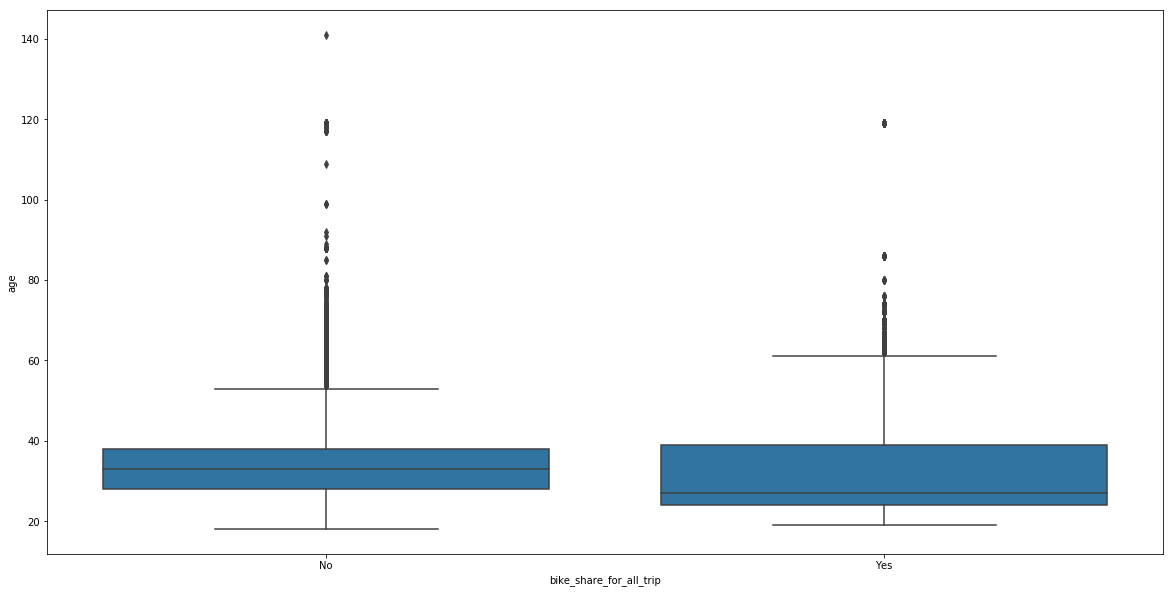

In [93]:
sb.boxplot(data = df, x = 'bike_share_for_all_trip', y = 'age', color = base_color)

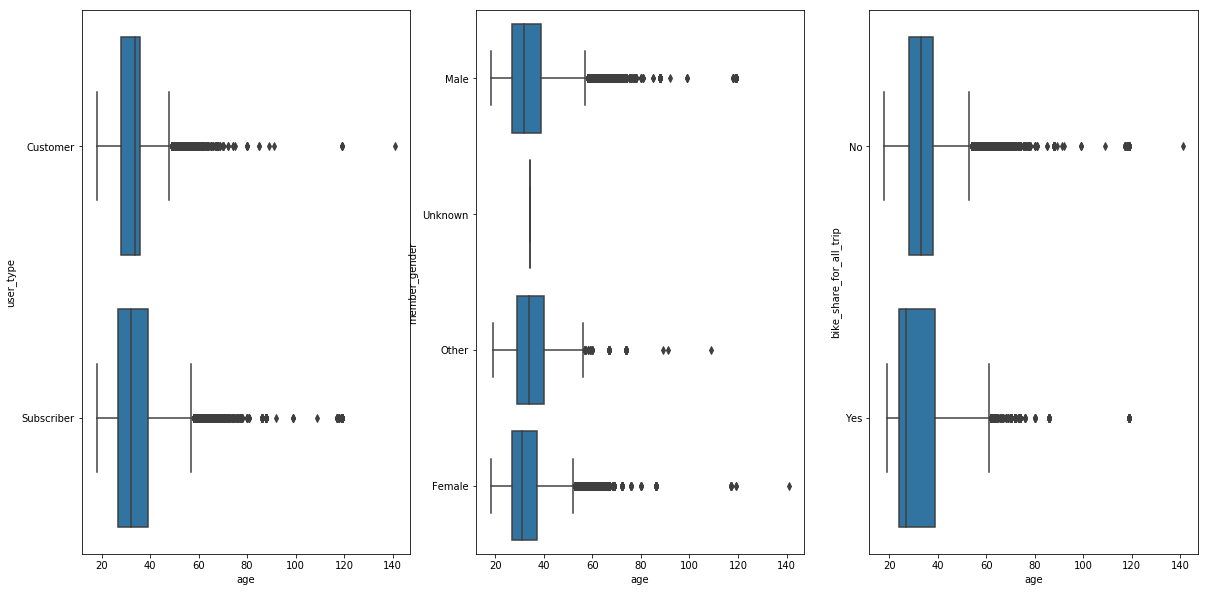

In [94]:
plt.subplot(1,3,1)
sb.boxplot(data = df, y = 'user_type', x = 'age', color = base_color)
plt.subplot(1,3,2)
sb.boxplot(data = df, y = 'member_gender', x = 'age', color = base_color)
plt.subplot(1,3,3)
sb.boxplot(data = df, y = 'bike_share_for_all_trip', x = 'age', color = base_color)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text xticklabel objects>)

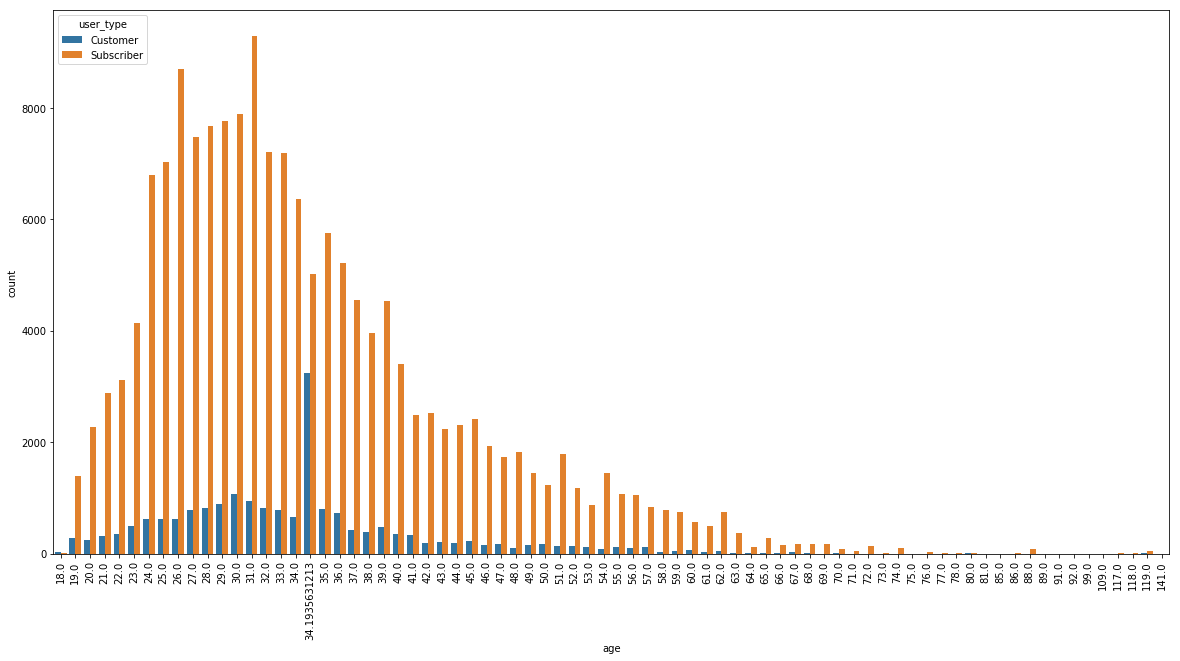

In [95]:
sb.countplot(data=df, x='age', hue='user_type')
plt.xticks(rotation=90)

In [96]:
df.member_gender.unique()

array(['Male', 'Unknown', 'Other', 'Female'], dtype=object)

In [97]:
mf = df
not_mf = mf.query("member_gender == ['Unknown', 'Other']")
mf.drop(not_mf.index,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

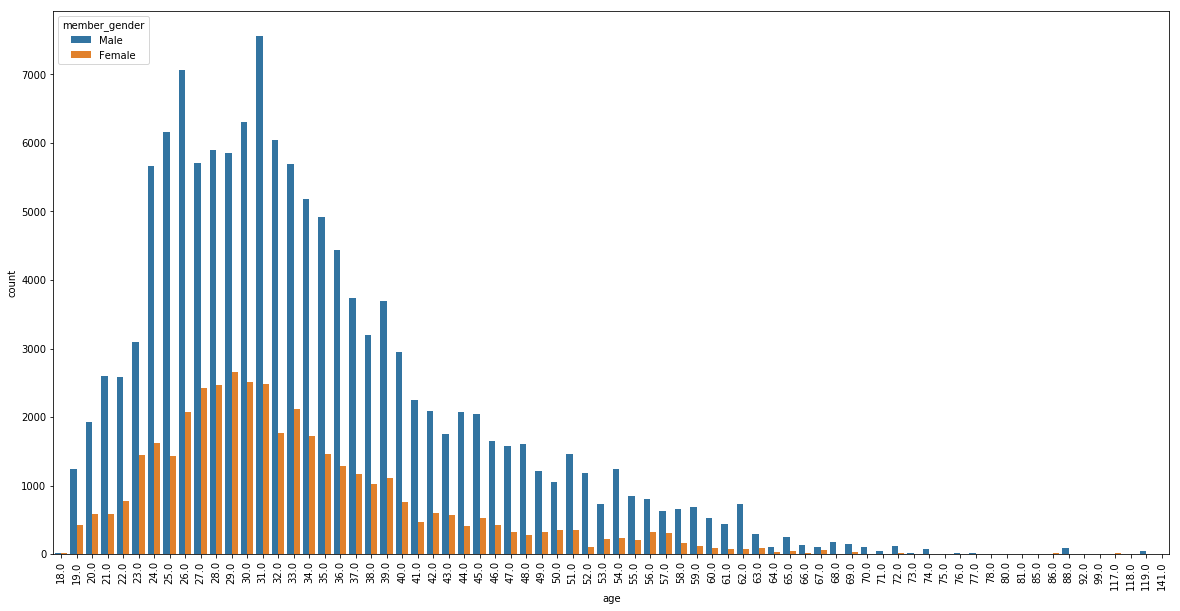

In [98]:
sb.countplot(data=mf, x='age', hue='member_gender')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

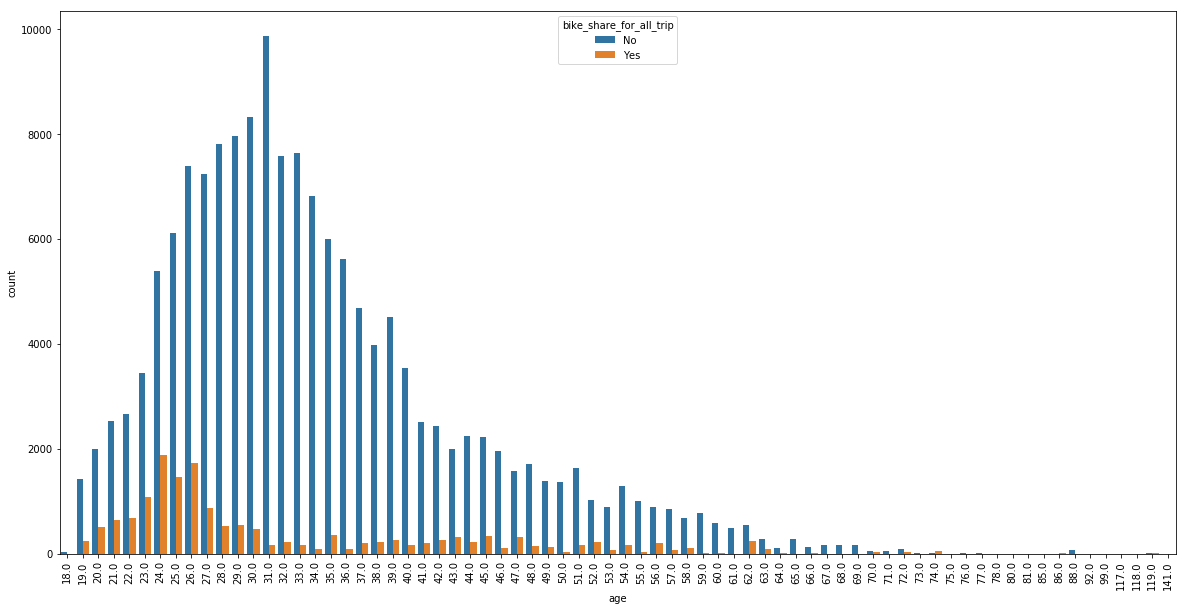

In [99]:
sb.countplot(data=mf, x='age', hue='bike_share_for_all_trip')
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe17b673b00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe17a943b38>]], dtype=object)

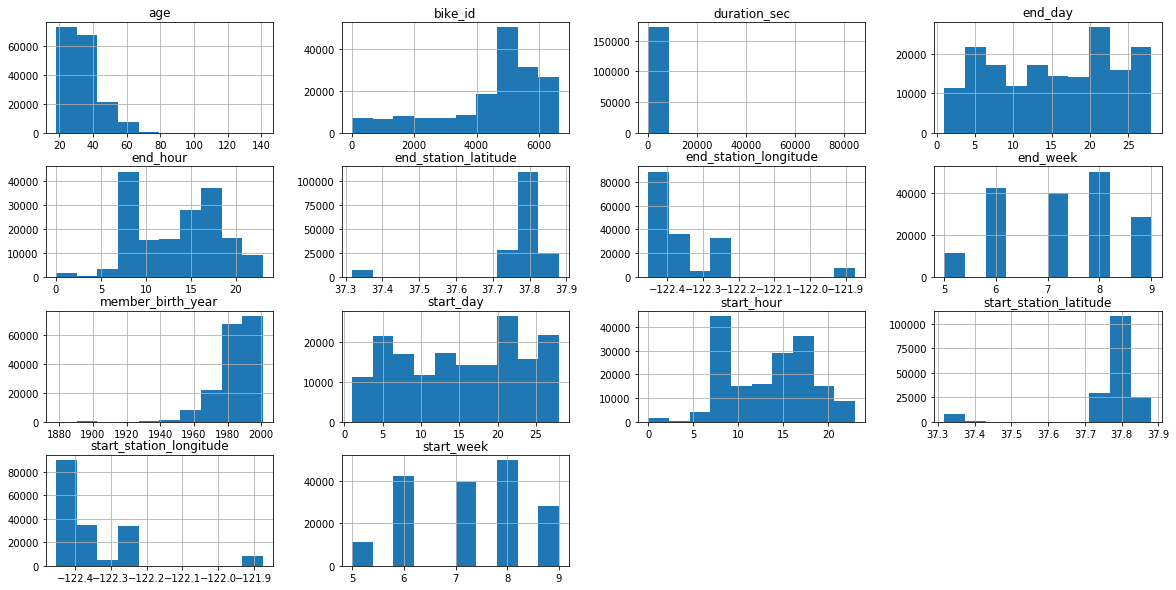

In [100]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe17c6e1c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe17982d5c0>]], dtype=object)

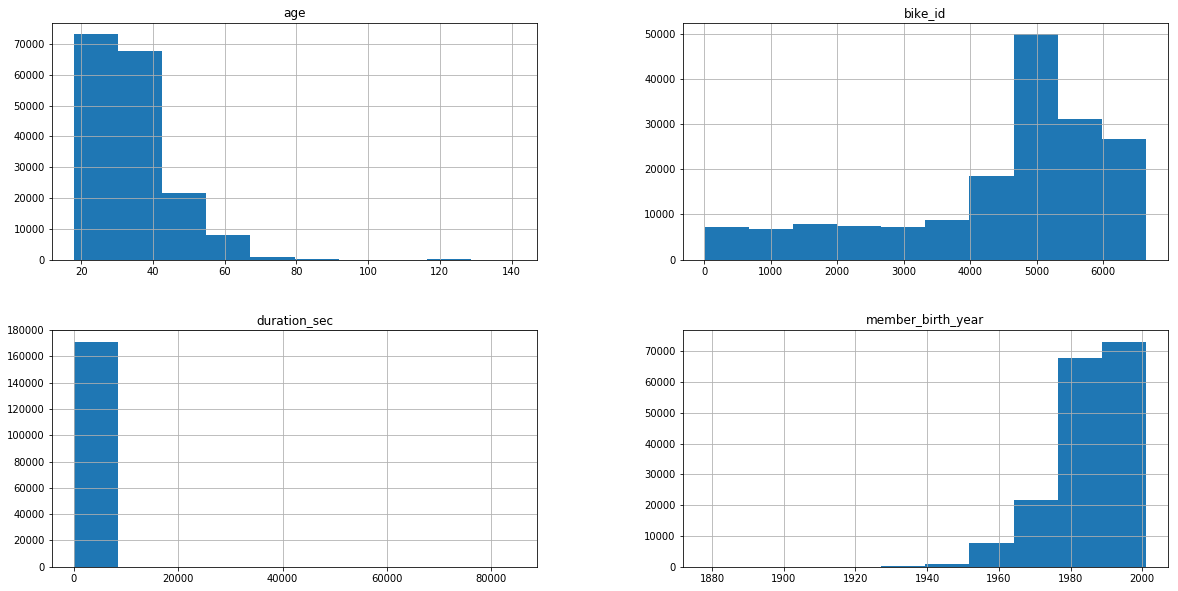

In [101]:
df[['age', 'member_birth_year', 'bike_id', 'duration_sec']].hist()

# Multivariate

In [102]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age',
       'start_day', 'start_week', 'start_hour', 'end_day', 'end_week',
       'end_hour'],
      dtype='object')

## Categorical Nominal values

-tip:'start_station_id','start_station_name','end_station_id','end_station_name',(clasification is too large).<br>

-tip:'bike_id'(maybe).<br>

-tip:'user_type','member_gender', 'bike_share_for_all_trip',(clasification found).

## quantitative values

'start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude',<br>
(not important because it is just dementions)<br>

'start_time', 'end_time', 'start_week', 'end_week','start_day', 'end_day'<br>
(not important because it is not afect the age variable)<br>

'duration_sec','start_hour','end_hour'

## Shape

## duration_sec

-tip:'user_type','member_gender', 'bike_share_for_all_trip',(clasification found).

In [103]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

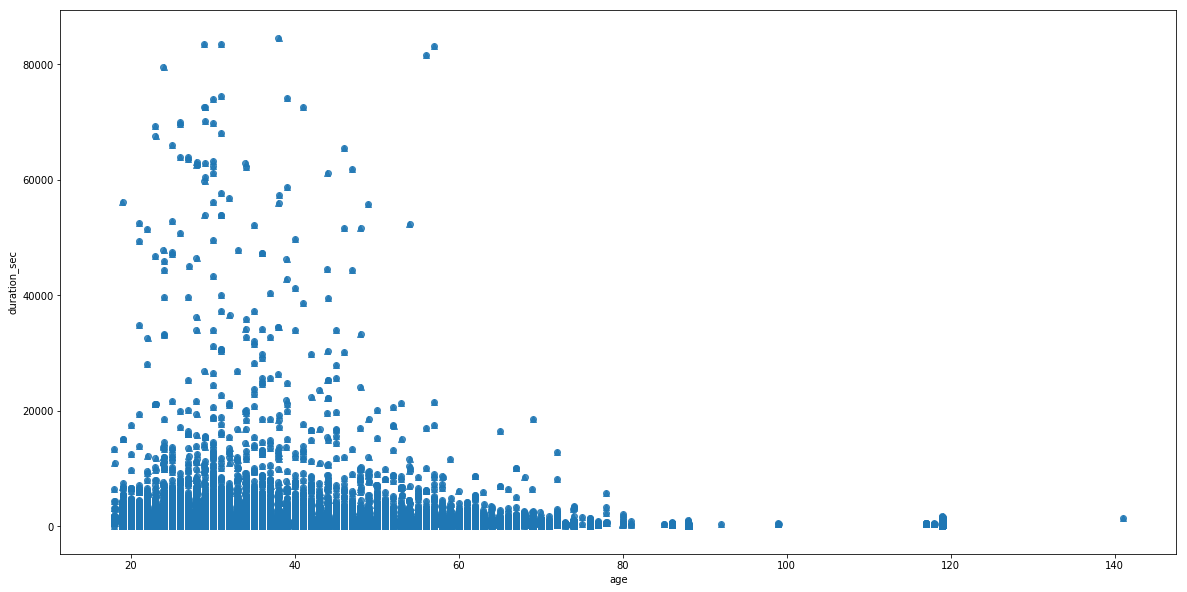

In [118]:
ttype_markers = [['Customer','o'],
                 ['Subscriber','^']]
for ttype,marker in ttype_markers:
    plot_data = df.loc[df['user_type']== ttype]
    sb.regplot(data=df,x='age',y='duration_sec',x_jitter=0.04, fit_reg=False,color = base_color, marker = marker)

In [105]:
df['member_gender'].unique()

array(['Male', 'Female'], dtype=object)

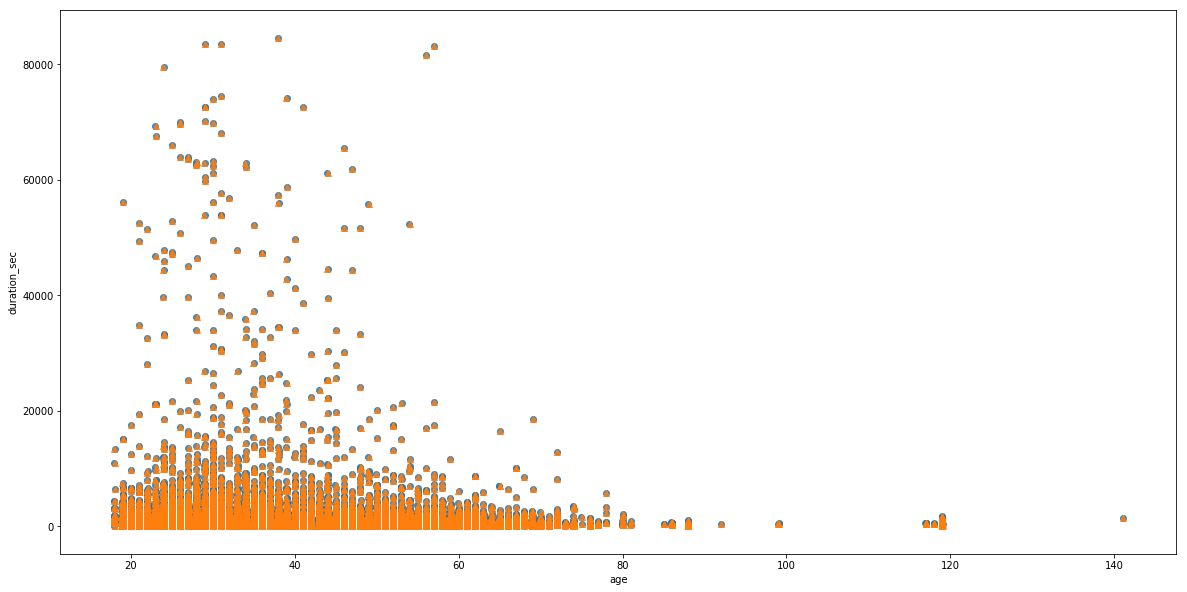

In [106]:
ttype_markers = [['Male','o'],
                 ['Female','^']]
for ttype,marker in ttype_markers:
    plot_data = df.loc[df['member_gender']== ttype]
    sb.regplot(data=df,x='age',y='duration_sec',x_jitter=0.04, fit_reg=False,marker = marker)

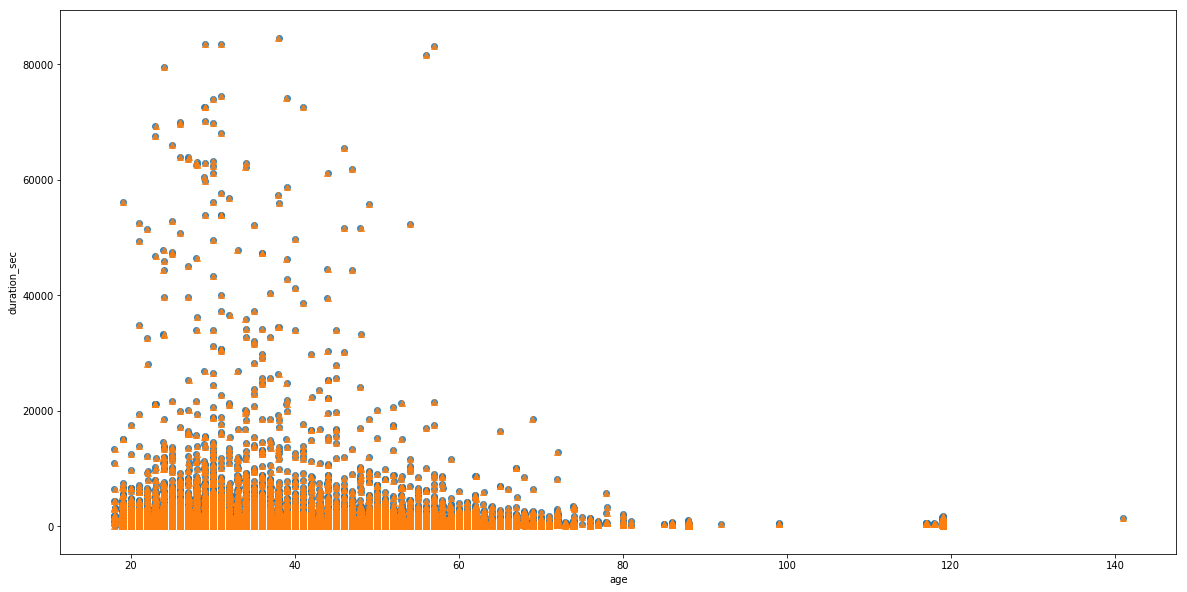

In [107]:
ttype_markers = [['Yes','o'],
                 ['No','^']]
for ttype,marker in ttype_markers:
    plot_data = df.loc[df['bike_share_for_all_trip']== ttype]
    sb.regplot(data=df,x='age',y='duration_sec',x_jitter=0.04, fit_reg=False,marker = marker)

## start_hour

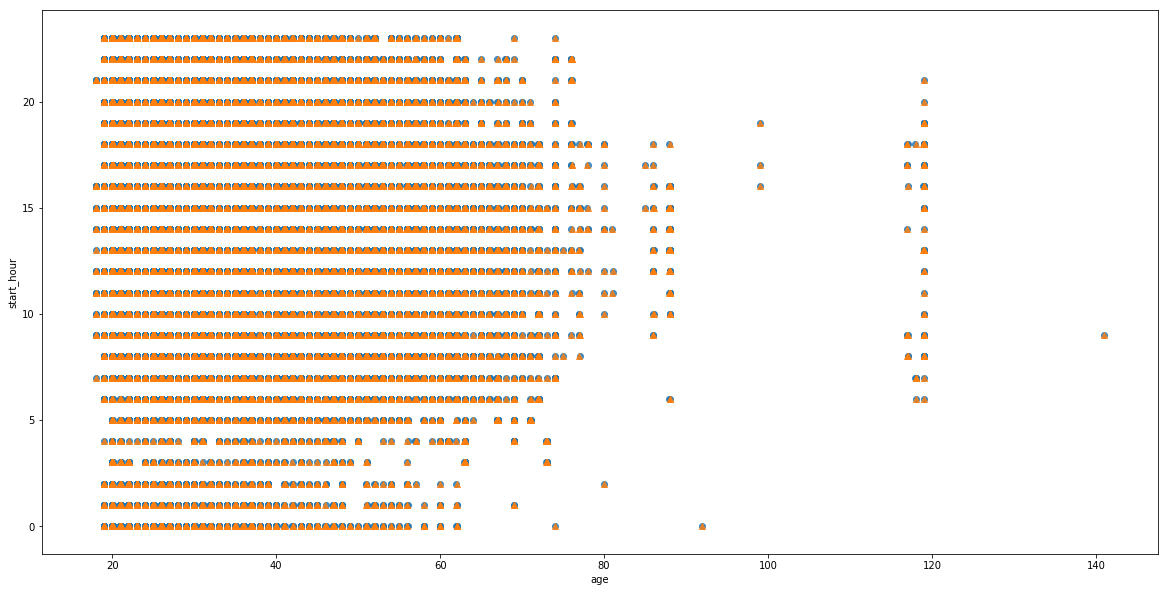

In [108]:
ttype_markers = [['Customer','o'],
                 ['Subscriber','^']]
for ttype,marker in ttype_markers:
    plot_data = df.loc[df['user_type']== ttype]
    sb.regplot(data=df,x='age',y='start_hour',x_jitter=0.04, fit_reg=False,marker = marker)

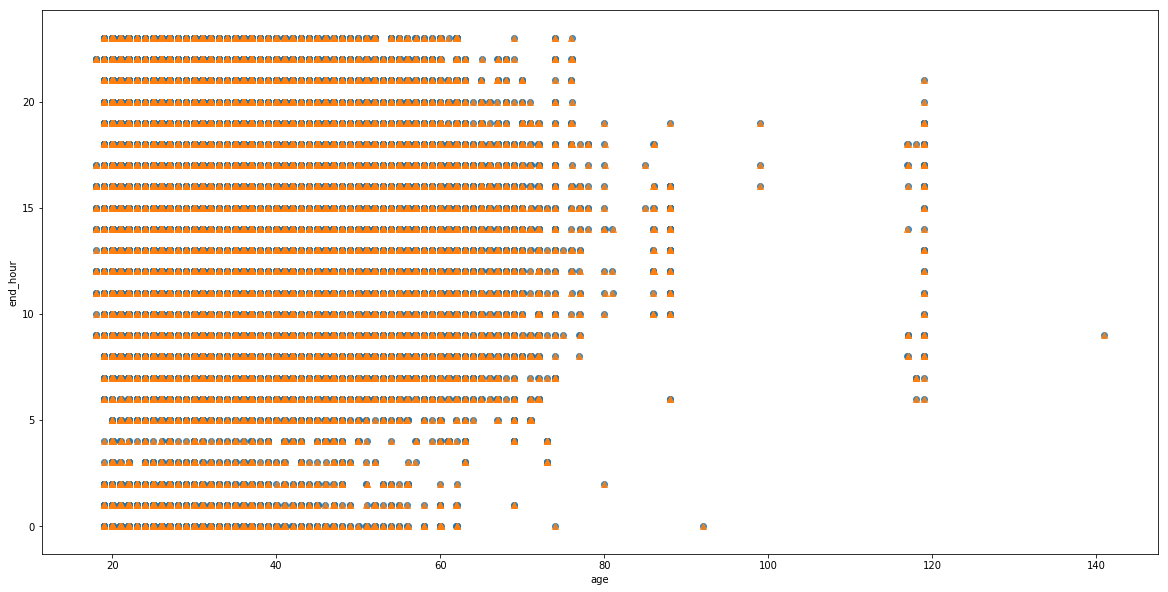

In [109]:
ttype_markers = [['Male','o'],
                 ['Female','^']]
for ttype,marker in ttype_markers:
    plot_data = df.loc[df['member_gender']== ttype]
    sb.regplot(data=df,x='age',y='end_hour',x_jitter=0.04, fit_reg=False,marker = marker)

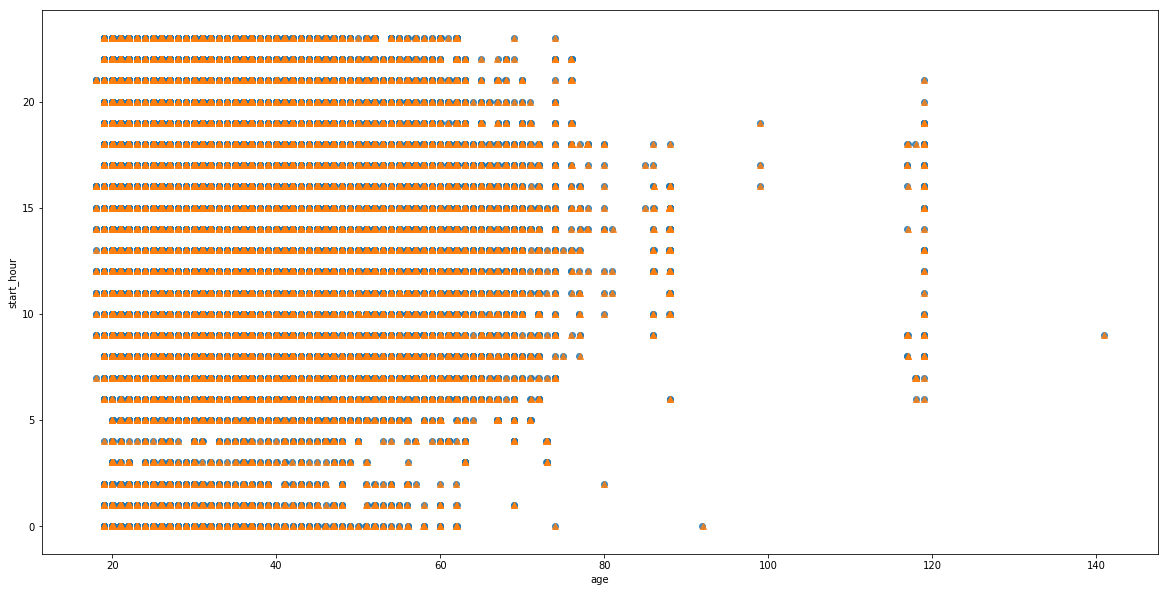

In [110]:
ttype_markers = [['Yes','o'],
                 ['No','^']]
for ttype,marker in ttype_markers:
    plot_data = df.loc[df['bike_share_for_all_trip']== ttype]
    sb.regplot(data=df,x='age',y='start_hour',x_jitter=0.04, fit_reg=False,marker = marker)

## Size

## quantitative values
'duration_sec','start_hour','end_hour'

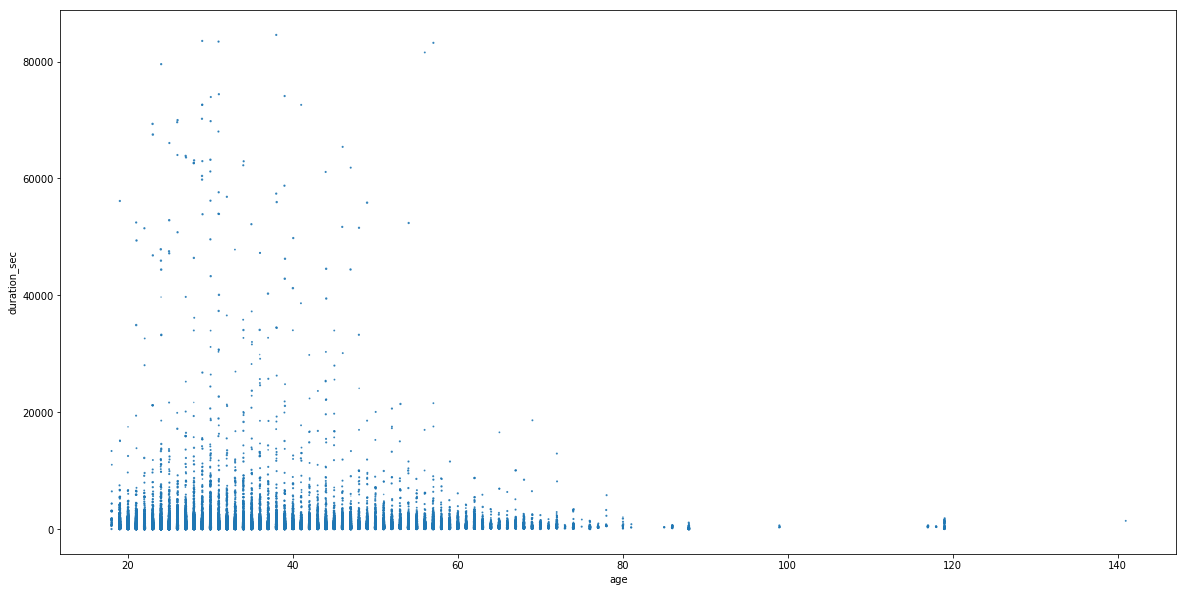

In [111]:
sb.regplot(data=df,x='age',y='duration_sec',x_jitter=0.04, fit_reg=False,scatter_kws = {'s':df['start_hour']/10})

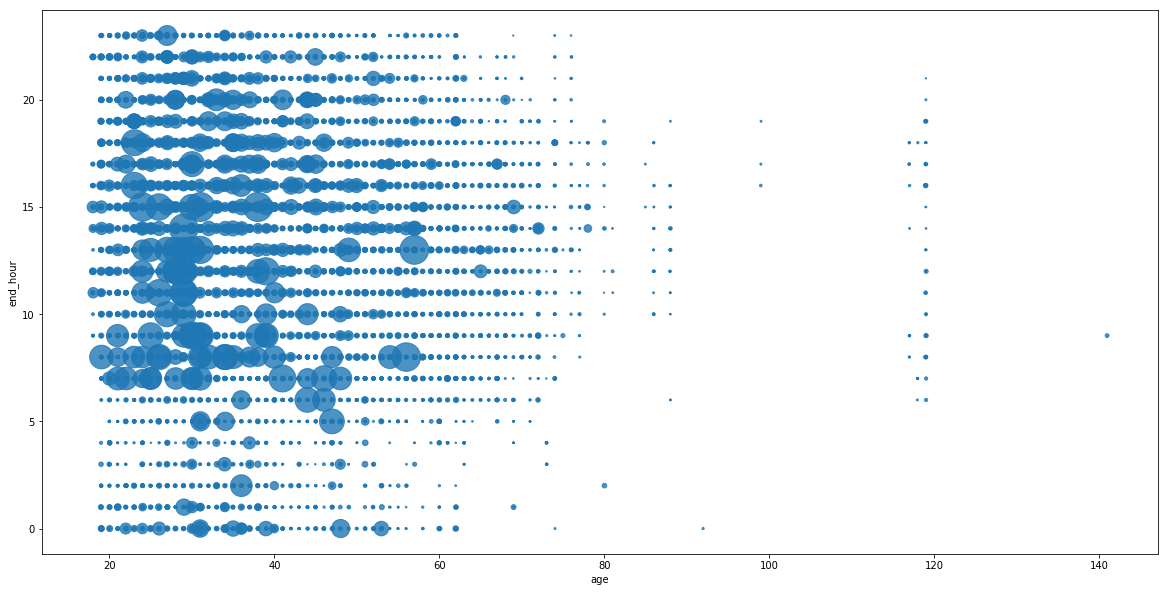

In [112]:
sb.regplot(data=df,x='age',y='end_hour',x_jitter=0.04, fit_reg=False,scatter_kws = {'s':df['duration_sec']/100})

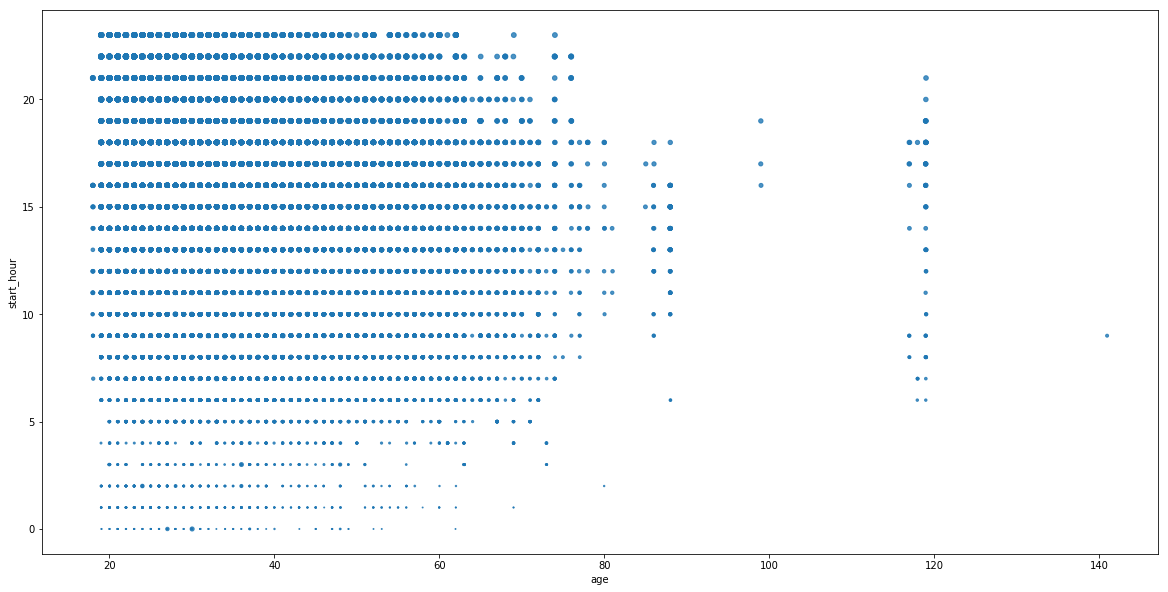

In [113]:
sb.regplot(data=df,x='age',y='start_hour',x_jitter=0.04, fit_reg=False,scatter_kws = {'s':df['end_hour']})

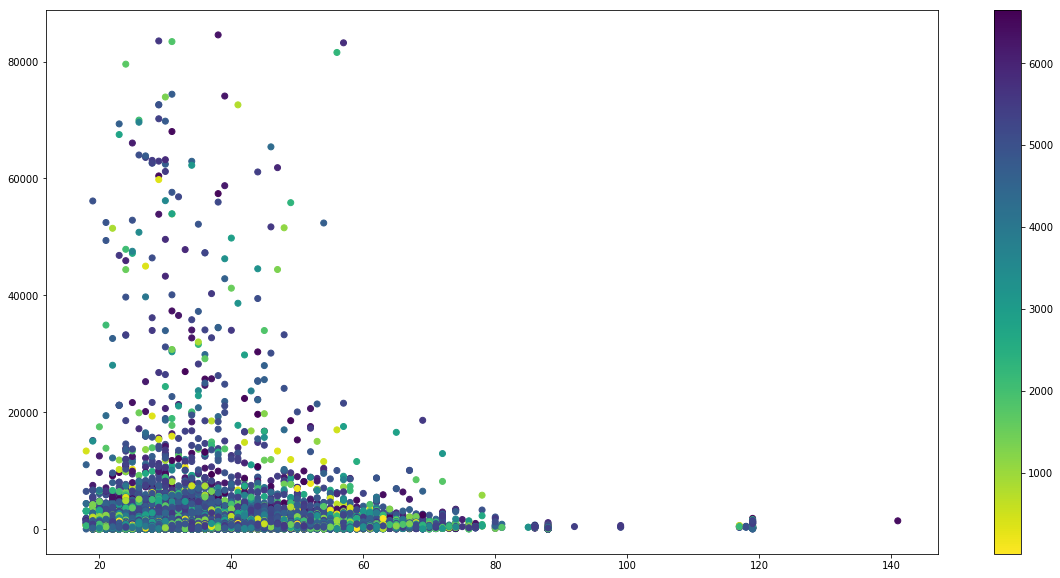

In [114]:
plt.scatter(data=df, x='age', y='duration_sec', c='bike_id',
           cmap = 'viridis_r')
plt.colorbar()

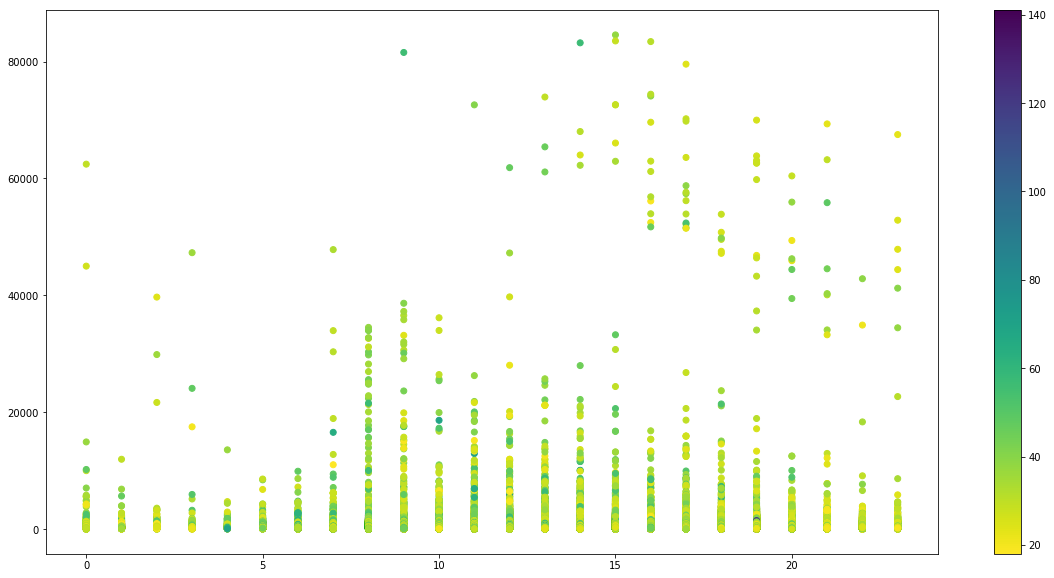

In [115]:
plt.scatter(data=df, x='start_hour', y='duration_sec', c='age',
           cmap = 'viridis_r')
plt.colorbar()

## Categorical Nominal values
-tip:'start_station_id','start_station_name','end_station_id','end_station_name',(clasification is too large).

-tip:'bike_id'(maybe).

-tip:'user_type','member_gender', 'bike_share_for_all_trip',(clasification found).

## quantitative values
'start_station_latitude','start_station_longitude','end_station_latitude', 'end_station_longitude',
(not important because it is just dementions)

'start_time', 'end_time', 'start_week', 'end_week','start_day', 'end_day'
(not important because it is not afect the age variable)

'duration_sec','start_hour','end_hour'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]), <a list of 72 Text xticklabel objects>)

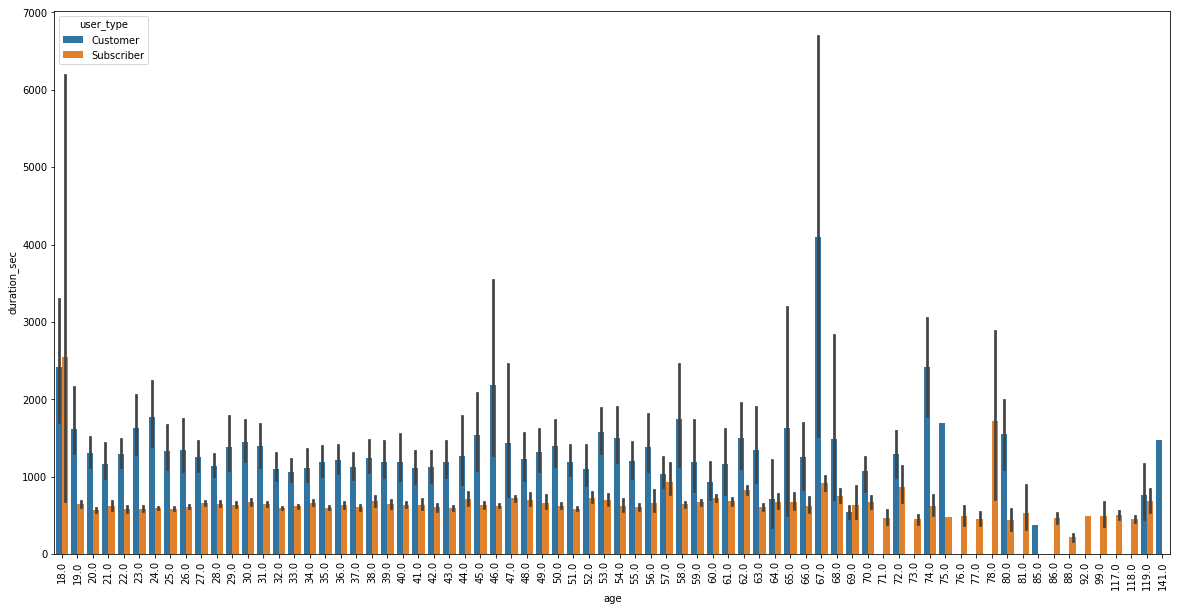

In [116]:
sb.barplot(data=df, x='age',y='duration_sec', hue='user_type')
plt.xticks(rotation=90)

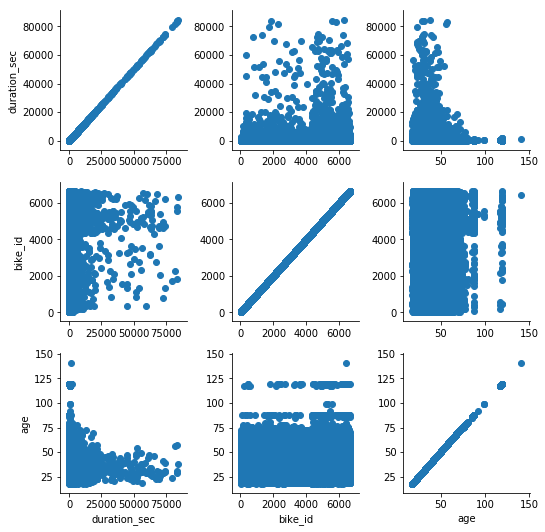

In [117]:
quantitative = ['duration_sec','bike_id','age']
g = sb.PairGrid(data = df, vars = quantitative)
g.map(plt.scatter)